In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import datetime
import nltk
import time

from shared_lib import utils, vocabulary
from shared_lib import ngram_lm
from shared_lib import ngram_utils
from shared_lib import simple_trigram

%matplotlib inline

In [2]:
boston_bomb_df = pd.read_json('data/reddit/boston_comments_2013.03-2013.05.txt', lines=True)
boston_series_df = pd.read_json('data/reddit/boston_comments_2013.10-2013.11.txt', lines=True)
#colorado_df = pd.read_json('data/reddit/colorado_comments_2017.06-2017.10.txt', lines=True)
florida_df = pd.read_json('data/reddit/florida_comments_2017.06-2017.10.txt', lines=True)
houston_df = pd.read_json('data/reddit/houston_comments_2017.06-2017.10.txt', lines=True)
miami_df = pd.read_json('data/reddit/miami_comments_2017.06-2017.10.txt', lines=True)
nyc_df = pd.read_json('data/reddit/nyc_comments_2012.08-2012.12.txt', lines=True)
puerto_rico_df = pd.read_json('data/reddit/puerto_rico_comments_2017.06-2017.10.txt', lines=True)
vegas_df = pd.read_json('data/reddit/vegas_comments_2017.06-2017.10.txt', lines=True)

In [3]:
boston_bomb_df.head()

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,link_id,name,parent_id,removal_reason,retrieved_on,score,score_hidden,subreddit,subreddit_id,ups
0,True,thejosharms,flair-AllstonBrighton,Allston/Brighton,I feel sketched out *driving* through that bac...,0,1362096043,None,0,0,...,t3_19erye,t1_c8njggx,t1_c8nicam,NaN,1431442958,1,False,boston,t5_2qh3r,1
1,True,thejosharms,flair-AllstonBrighton,Allston/Brighton,&gt;I always hear the jobs thing thrown around...,0,1362096219,None,0,0,...,t3_19erye,t1_c8njidi,t1_c8ng2kj,NaN,1431442993,1,False,boston,t5_2qh3r,1
2,True,thejosharms,flair-AllstonBrighton,Allston/Brighton,These issues are not mutually exclusive.,0,1362096257,None,0,0,...,t3_19erye,t1_c8njiru,t1_c8nimv8,NaN,1431443004,7,False,boston,t5_2qh3r,7
3,True,thejosharms,flair-AllstonBrighton,Allston/Brighton,"Yeah, my girlfriend really sucks because she o...",0,1362096383,None,0,0,...,t3_19erye,t1_c8njk3g,t1_c8ni8x5,NaN,1435577267,5,False,boston,t5_2qh3r,5
4,True,therealgreenbeans,flair-Quincy,Quincy,"That, or shuffling child molesters between con...",0,1362097021,None,0,0,...,t3_19eyqj,t1_c8njqvf,t1_c8nh704,NaN,1431443137,22,False,boston,t5_2qh3r,22


In [4]:
boston_bomb_df.shape

(63027, 22)

In [5]:
boston_series_df.head()

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,link_id,name,parent_id,removal_reason,retrieved_on,score,score_hidden,subreddit,subreddit_id,ups
0,True,vagr,flair-Belmont,Belmont,"I used to intern at Experian, can't say its tr...",0,1380585622,None,0,0,...,t3_1ngr21,t1_cciiu4k,t3_1ngr21,NaN,1429288630,1,False,boston,t5_2qh3r,1
1,True,yacht_boy,flair-Roxbury,Roxbury,"It's split by area, roughly in chronological o...",0,1380585925,None,0,0,...,t3_1ndmo2,t1_cciixte,t1_cchl3b6,NaN,1429288582,1,False,boston,t5_2qh3r,1
2,True,[deleted],None,None,[deleted],0,1380585936,None,0,0,...,t3_1nfp0s,t1_cciixyv,t1_ccii3qp,NaN,1429288580,-2,False,boston,t5_2qh3r,-2
3,True,theantipode,flair-Somerville,Somerville,I only know one person that goes to Artisan's ...,0,1380585980,None,0,0,...,t3_1ngr21,t1_cciiyho,t3_1ngr21,NaN,1429288574,1,False,boston,t5_2qh3r,1
4,True,goldielax25,None,None,Everyone avoids Southie... Fine by me!,0,1380586032,None,0,0,...,t3_1ngr21,t1_cciiz3r,t3_1ngr21,NaN,1429288566,1,False,boston,t5_2qh3r,1


In [6]:
boston_series_df.shape

(23359, 22)

In [7]:
#colorado_df.head()

In [8]:
#colorado_df.shape

In [9]:
florida_df.head()

,approved_at_utc,author,author_cakeday,author_flair_css_class,author_flair_text,banned_at_utc,body,can_gild,can_mod_post,collapsed,...,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id
0,NaN,cmyer,NaN,None,None,NaN,I want to follow up with a serious question as...,True,NaN,NaN,...,diang3f,NaN,t3_6ehiqn,t1_diadp8t,NaN,1498961741,3,False,florida,t5_2qh7q
1,NaN,ceejiesqueejie,NaN,None,None,NaN,I agree with you!,True,NaN,NaN,...,dianjqh,NaN,t3_6eeqpw,t1_dian9a7,NaN,1498961794,2,False,florida,t5_2qh7q
2,NaN,[deleted],NaN,None,None,NaN,[deleted],True,NaN,NaN,...,diapthm,NaN,t3_6ej4x5,t3_6ej4x5,NaN,1498962908,2,False,florida,t5_2qh7q
3,NaN,y2km11,NaN,None,None,NaN,I am on the east side and it definitely is cra...,True,NaN,NaN,...,diapycf,NaN,t3_6ej4x5,t1_diapthm,NaN,1498962975,3,False,florida,t5_2qh7q
4,NaN,[deleted],NaN,None,None,NaN,[deleted],True,NaN,NaN,...,diaq167,NaN,t3_6egvd0,t3_6egvd0,NaN,1498963016,1,False,florida,t5_2qh7q


In [10]:
florida_df.shape

(23750, 26)

In [11]:
houston_df.head()

,approved_at_utc,author,author_cakeday,author_flair_css_class,author_flair_text,banned_at_utc,body,can_gild,can_mod_post,collapsed,...,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id
0,NaN,[deleted],NaN,None,None,NaN,[deleted],True,NaN,NaN,...,diandly,NaN,t3_6eh8m6,t1_diaf97m,NaN,1498961706,2,False,houston,t5_2qj1l
1,NaN,[deleted],NaN,None,None,NaN,[deleted],True,NaN,NaN,...,diane6f,NaN,t3_6efskr,t1_diam7y6,NaN,1498961715,7,False,houston,t5_2qj1l
2,NaN,latinrprince79,NaN,None,None,NaN,You would think white hersey kisses.,True,NaN,NaN,...,diane9k,NaN,t3_6ee03q,t1_di9owbl,NaN,1498961716,3,False,houston,t5_2qj1l
3,NaN,therealshadeslimmy,NaN,None,None,NaN,of course. I'd say even less people know how t...,True,NaN,NaN,...,dianetc,NaN,t3_6eh1th,t1_diandk3,NaN,1498961723,3,False,houston,t5_2qj1l
4,NaN,chocolate-syrup,NaN,,League City,NaN,"Yeah, don't be greedy!",True,NaN,NaN,...,dianox5,NaN,t3_6ehvzo,t1_diamnba,NaN,1498961863,3,False,houston,t5_2qj1l


In [12]:
houston_df.shape

(289776, 26)

In [13]:
miami_df.head()

,approved_at_utc,author,author_cakeday,author_flair_css_class,author_flair_text,banned_at_utc,body,can_gild,can_mod_post,collapsed,...,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id
0,NaN,MargarineDawn,NaN,None,None,NaN,&gt; the Tri-Rail doesn't connect the two urba...,True,NaN,NaN,...,dianh57,NaN,t3_6ea9z8,t1_di9y6lv,NaN,1498961756,0,False,Miami,t5_2qi76
1,NaN,MargarineDawn,NaN,None,None,NaN,You're assuming everyone coming to a Heat game...,True,NaN,NaN,...,dianqm9,NaN,t3_6ea9z8,t1_dia2knq,NaN,1498961887,-1,False,Miami,t5_2qi76
2,NaN,toolazyforaname,NaN,None,None,NaN,Nice! In for 2,True,NaN,NaN,...,dianzm5,NaN,t3_6egra4,t3_6egra4,NaN,1498962009,1,False,Miami,t5_2qi76
3,NaN,kevski82,NaN,None,None,NaN,Miami FC play in NASL,True,NaN,NaN,...,diapiey,NaN,t3_6effvw,t1_dian7kt,NaN,1498962752,2,False,Miami,t5_2qi76
4,NaN,_EventHorizon_,NaN,None,None,NaN,Metrorail doesn't go anywhere. Have you been t...,True,NaN,NaN,...,diappq6,NaN,t3_6effvw,t1_dian7mm,NaN,1498962854,1,False,Miami,t5_2qi76


In [14]:
miami_df.shape

(27184, 26)

In [15]:
nyc_df.head()

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,link_id,name,parent_id,removal_reason,retrieved_on,score,score_hidden,subreddit,subreddit_id,ups
0,True,mzito,None,None,"Wow, that's a new one. Uhhh...well, other tha...",0,1343779233,None,0,0,...,t3_xh5vp,t1_c5mavna,t3_xh5vp,NaN,1429520012,4,False,nyc,t5_2qhu2,4
1,True,SugoiUser,,Dyker Heights,I like oldies :(\n\nCBS FM,0,1343779274,None,0,0,...,t3_xgfqf,t1_c5mavys,t3_xgfqf,NaN,1429520016,1,False,nyc,t5_2qhu2,1
2,True,SugoiUser,,Dyker Heights,Hey didn't they start the construction of the ...,0,1343779283,None,0,0,...,t3_xejs9,t1_c5maw1f,t3_xejs9,NaN,1429520017,2,False,nyc,t5_2qhu2,2
3,True,ContractWithDog,,Inwood,Yes. He's fine. He has allergies and just got ...,0,1343779333,None,0,0,...,t3_xgpru,t1_c5mawg8,t1_c5mau3c,NaN,1429520022,4,False,nyc,t5_2qhu2,4
4,True,mship,None,None,I would just find the next closet train that w...,0,1343779597,None,0,0,...,t3_xgrxa,t1_c5maymk,t3_xgrxa,NaN,1429520050,2,False,nyc,t5_2qhu2,2


In [16]:
nyc_df.shape

(75450, 22)

In [17]:
puerto_rico_df.head()

,approved_at_utc,author,author_cakeday,author_flair_css_class,author_flair_text,banned_at_utc,body,can_gild,can_mod_post,collapsed,...,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id
0,NaN,goro413,NaN,rincon,Rincón,NaN,12 de Junio: [Expectativa](http://gph.is/1UK1Z...,True,NaN,NaN,...,diapvk0,NaN,t3_6eikmx,t1_diake6i,NaN,1498962936,1,False,PuertoRico,t5_2qjyb
1,NaN,Chavoulier,NaN,None,None,NaN,"Mucho brillo, y poca sustancia en sus argument...",True,NaN,NaN,...,diapzx6,NaN,t3_6eikmx,t3_6eikmx,NaN,1498962997,3,False,PuertoRico,t5_2qjyb
2,NaN,MisteryYourMamaMan,NaN,None,None,NaN,"Exactamente lo que digo, solo el tiempo nos di...",True,NaN,NaN,...,diaq685,NaN,t3_6eikmx,t1_diapzx6,NaN,1498963085,3,False,PuertoRico,t5_2qjyb
3,NaN,Chavoulier,NaN,None,None,NaN,Hablando del bendito plebiscito (el cual aún n...,True,NaN,NaN,...,diaqcrq,NaN,t3_6eikmx,t1_diaq685,NaN,1498963173,5,False,PuertoRico,t5_2qjyb
4,NaN,Collectingcurrency,NaN,estadosunidos,New York,NaN,The original Lares flag is light blue and not ...,True,NaN,NaN,...,diaqm5x,NaN,t3_6egwu6,t3_6egwu6,NaN,1498963301,8,False,PuertoRico,t5_2qjyb


In [18]:
puerto_rico_df.shape

(17164, 26)

In [19]:
vegas_df.shape

(27094, 26)

In [20]:
vegas_df.head()

,approved_at_utc,author,author_cakeday,author_flair_css_class,author_flair_text,banned_at_utc,body,can_gild,can_mod_post,collapsed,...,id,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id
0,NaN,rubberrtoe,NaN,None,None,NaN,Don't these street picture people make tons of...,True,NaN,NaN,...,dianh5a,NaN,t3_6edlej,t3_6edlej,NaN,1498961756,3,False,vegas,t5_2qhrs
1,NaN,VegasLinux,NaN,None,None,NaN,hmm... some mixed reviews. I'm going to be in ...,True,NaN,NaN,...,diaoj3i,NaN,t3_6ehxmm,t1_diaits4,NaN,1498962272,1,False,vegas,t5_2qhrs
2,NaN,[deleted],NaN,None,None,NaN,[deleted],True,NaN,NaN,...,diaoxlc,NaN,t3_684ah5,t3_684ah5,NaN,1498962469,1,False,vegas,t5_2qhrs
3,NaN,FrankieAK,NaN,None,None,NaN,My SO and I are planning on coming with our th...,True,NaN,NaN,...,diap3t0,NaN,t3_684ah5,t3_684ah5,NaN,1498962555,1,False,vegas,t5_2qhrs
4,NaN,CPM17,NaN,None,None,NaN,Also call Richard Carrillo's office or email h...,True,NaN,NaN,...,diaqy0b,NaN,t3_6ejafc,t3_6ejafc,NaN,1498963466,20,False,vegas,t5_2qhrs


In [21]:
# setup local times
boston_bomb_df['created_at_local'] = pd.to_datetime(boston_bomb_df['created_utc'], unit='s') \
                                     .dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
boston_series_df['created_at_local'] = pd.to_datetime(boston_series_df['created_utc'], unit='s') \
                                     .dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
# colorado_df['created_at_local'] = pd.to_datetime(colorado_df['created_utc'], unit='s') \
#                                      .dt.tz_localize('UTC').dt.tz_convert('US/Mountain')
florida_df['created_at_local'] = pd.to_datetime(florida_df['created_utc'], unit='s') \
                                     .dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
houston_df['created_at_local'] = pd.to_datetime(houston_df['created_utc'], unit='s') \
                                     .dt.tz_localize('UTC').dt.tz_convert('US/Central')
miami_df['created_at_local'] = pd.to_datetime(miami_df['created_utc'], unit='s') \
                                     .dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
nyc_df['created_at_local'] = pd.to_datetime(nyc_df['created_utc'], unit='s') \
                                 .dt.tz_localize('UTC').dt.tz_convert('US/Eastern')
puerto_rico_df['created_at_local'] = pd.to_datetime(puerto_rico_df['created_utc'], unit='s') \
                                 .dt.tz_localize('UTC').dt.tz_convert('America/Puerto_Rico')
vegas_df['created_at_local'] = pd.to_datetime(vegas_df['created_utc'], unit='s') \
                                 .dt.tz_localize('UTC').dt.tz_convert('US/Pacific')  

In [22]:
florida_df.sort_values('created_at_local', ascending=False).head(5)

,approved_at_utc,author,author_cakeday,author_flair_css_class,author_flair_text,banned_at_utc,body,can_gild,can_mod_post,collapsed,...,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id,created_at_local
23749,NaN,mrcanard,NaN,,central east coast,NaN,My first thought also. Haunted east end of Atl...,True,NaN,NaN,...,0.0,t3_79vzkb,t1_dp5cz68,/r/florida/comments/79vzkb/and_you_said_i_need...,1510374170,1,False,florida,t5_2qh7q,2017-10-31 19:54:55-04:00
23748,NaN,NastyNate4,NaN,None,None,NaN,I can see the basis for your point. Though I ...,True,NaN,NaN,...,0.0,t3_79riwo,t1_dp5lj04,/r/florida/comments/79riwo/progressive_resolut...,1510373910,2,False,florida,t5_2qh7q,2017-10-31 19:43:53-04:00
23747,NaN,nortonbw,NaN,None,None,NaN,Harder to get away with murder in an Uber.,True,NaN,NaN,...,0.0,t3_79xqe7,t1_dp5vfe4,/r/florida/comments/79xqe7/anyone_in_north_cen...,1510373636,10,False,florida,t5_2qh7q,2017-10-31 19:32:46-04:00
23746,NaN,Yalum,NaN,None,None,NaN,I should have done this with the sofa I bought...,True,NaN,NaN,...,0.0,t3_79vzkb,t3_79vzkb,/r/florida/comments/79vzkb/and_you_said_i_need...,1510373517,1,False,florida,t5_2qh7q,2017-10-31 19:27:47-04:00
23745,NaN,sawntime,NaN,None,None,NaN,Salt/Fresh covers what you are planning. If yo...,True,NaN,NaN,...,0.0,t3_79xtr9,t3_79xtr9,/r/florida/comments/79xtr9/fwc_licence_and_per...,1510373130,1,False,florida,t5_2qh7q,2017-10-31 19:12:00-04:00


In [23]:
miami_df[miami_df['body'].str.contains('hurricane')]

,approved_at_utc,author,author_cakeday,author_flair_css_class,author_flair_text,banned_at_utc,body,can_gild,can_mod_post,collapsed,...,is_submitter,link_id,parent_id,permalink,retrieved_on,score,stickied,subreddit,subreddit_id,created_at_local
141,NaN,running_rum,NaN,,305,NaN,Tonight is the opening of the Hurricane Andrew...,True,NaN,NaN,...,NaN,t3_6e1bdz,t3_6e1bdz,NaN,1498986106,3,False,Miami,t5_2qi76,2017-06-01 16:43:07-04:00
553,NaN,_Kramerica_,NaN,None,None,NaN,So in mid September I will be staying in south...,True,NaN,NaN,...,NaN,t3_6e1bdz,t3_6e1bdz,NaN,1499081534,1,False,Miami,t5_2qi76,2017-06-05 10:43:30-04:00
571,NaN,_Kramerica_,NaN,None,None,NaN,So in mid September I will be staying in south...,True,NaN,NaN,...,NaN,t3_6fetex,t3_6fetex,NaN,1499085605,3,False,Miami,t5_2qi76,2017-06-05 13:20:15-04:00
593,NaN,jitta71,NaN,None,None,NaN,We haven't had a hurricane in a while besides ...,True,NaN,NaN,...,NaN,t3_6fetex,t1_dihr4iu,NaN,1499088563,1,False,Miami,t5_2qi76,2017-06-05 15:09:44-04:00
627,NaN,SpicyLangosta,NaN,None,None,NaN,don't cancel a trip over a hypothetical hurric...,True,NaN,NaN,...,NaN,t3_6fetex,t1_dihr4iu,NaN,1499094683,3,False,Miami,t5_2qi76,2017-06-05 19:09:28-04:00
767,NaN,Sarahbellum820,NaN,None,None,NaN,Our summers are incredibly rainy. June begins ...,True,NaN,NaN,...,NaN,t3_6fod4d,t3_6fod4d,NaN,1499122160,3,False,Miami,t5_2qi76,2017-06-06 17:06:23-04:00
885,NaN,Villager723,NaN,None,None,NaN,I might have bad memory but I've never seen it...,True,NaN,NaN,...,NaN,t3_6ft5cc,t1_dikxy0n,NaN,1499146543,16,False,Miami,t5_2qi76,2017-06-07 13:45:57-04:00
905,NaN,EncyclopaediaBrown,NaN,None,None,NaN,"You're right. About 10"" have come down over th...",True,NaN,NaN,...,NaN,t3_6ft5cc,t1_dil6a5q,NaN,1499151539,7,False,Miami,t5_2qi76,2017-06-07 16:44:42-04:00
939,NaN,you_sick_ducks,NaN,,gringo loco,NaN,rainy season is (was) the norm with daily show...,True,NaN,NaN,...,NaN,t3_6ft5cc,t1_dilq0sd,NaN,1499156442,2,False,Miami,t5_2qi76,2017-06-07 20:08:07-04:00
962,NaN,Minoripriest,NaN,None,None,NaN,"It's hurricane season, smart move to he prepar...",True,NaN,NaN,...,NaN,t3_6ft5cc,t1_dilre27,NaN,1499163041,2,False,Miami,t5_2qi76,2017-06-08 01:01:56-04:00


In [24]:
nyc_df.sort_values('created_at_local', ascending=True).head(10)

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,name,parent_id,removal_reason,retrieved_on,score,score_hidden,subreddit,subreddit_id,ups,created_at_local
0,True,mzito,None,None,"Wow, that's a new one. Uhhh...well, other tha...",0,1343779233,None,0,0,...,t1_c5mavna,t3_xh5vp,NaN,1429520012,4,False,nyc,t5_2qhu2,4,2012-07-31 20:00:33-04:00
1,True,SugoiUser,,Dyker Heights,I like oldies :(\n\nCBS FM,0,1343779274,None,0,0,...,t1_c5mavys,t3_xgfqf,NaN,1429520016,1,False,nyc,t5_2qhu2,1,2012-07-31 20:01:14-04:00
2,True,SugoiUser,,Dyker Heights,Hey didn't they start the construction of the ...,0,1343779283,None,0,0,...,t1_c5maw1f,t3_xejs9,NaN,1429520017,2,False,nyc,t5_2qhu2,2,2012-07-31 20:01:23-04:00
3,True,ContractWithDog,,Inwood,Yes. He's fine. He has allergies and just got ...,0,1343779333,None,0,0,...,t1_c5mawg8,t1_c5mau3c,NaN,1429520022,4,False,nyc,t5_2qhu2,4,2012-07-31 20:02:13-04:00
4,True,mship,None,None,I would just find the next closet train that w...,0,1343779597,None,0,0,...,t1_c5maymk,t3_xgrxa,NaN,1429520050,2,False,nyc,t5_2qhu2,2,2012-07-31 20:06:37-04:00
5,True,rhott,,Chinatown,Grand Central &amp; the soon to be opened FDR ...,0,1343779712,None,0,0,...,t1_c5mazm9,t3_xg855,NaN,1429520063,3,False,nyc,t5_2qhu2,3,2012-07-31 20:08:32-04:00
6,True,lifeontheQtrain,None,None,yay!,0,1343779718,None,0,0,...,t1_c5mazml,t1_c5mawg8,NaN,1429520063,3,False,nyc,t5_2qhu2,3,2012-07-31 20:08:38-04:00
7,True,VELOXIMIDE,None,None,Inwood hill park. There's some weird stuff up ...,0,1343779789,None,0,0,...,t1_c5mb064,t3_xg855,NaN,1429520070,4,False,nyc,t5_2qhu2,4,2012-07-31 20:09:49-04:00
8,True,MoreConvenient,None,None,Thanks for the reply - I know it's hard to fin...,0,1343779957,None,0,0,...,t1_c5mb1ks,t1_c5mavna,NaN,1429520092,1,False,nyc,t5_2qhu2,1,2012-07-31 20:12:37-04:00
9,True,lifeontheQtrain,None,None,No Empire State Building in this shot. Still a...,0,1343780295,None,0,0,...,t1_c5mb4bk,t3_xgauc,NaN,1429520127,7,False,nyc,t5_2qhu2,7,2012-07-31 20:18:15-04:00


In [25]:
nyc_df[nyc_df['body'].str.contains('sandy')]

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,name,parent_id,removal_reason,retrieved_on,score,score_hidden,subreddit,subreddit_id,ups,created_at_local
13946,True,marvelously,None,None,It's a lot of beach and nature and not a lot o...,0,1345744441,None,0,0,...,t1_c5xnasg,t1_c5xif79,NaN,1429716538,1,False,nyc,t5_2qhu2,1,2012-08-23 13:54:01-04:00
42440,True,[deleted],None,None,Just created [/r/hurricanesandy](/r/hurricanes...,0,1351209827,None,0,1351210012,...,t1_c6rtmpm,t3_122b90,NaN,1430240509,3,False,nyc,t5_2qhu2,3,2012-10-25 20:03:47-04:00
42556,True,pujuma,None,None,what ? where tf is sandy ?,0,1351223285,None,0,0,...,t1_c6rwyy2,t3_123ljp,NaN,1430242080,1,False,nyc,t5_2qhu2,1,2012-10-25 23:48:05-04:00
43385,True,untogethered,None,None,I think the idea is that anyone in the country...,0,1351378748,None,0,0,...,t1_c6snxx6,t1_c6s95u8,NaN,1430255065,1,False,nyc,t5_2qhu2,1,2012-10-27 18:59:08-04:00
43620,True,learhpa,None,Morningside Heights,According to http://www.dnainfo.com/new-york/2...,0,1351436747,None,0,0,...,t1_c6swewb,t1_c6sw83a,NaN,1430259148,2,False,nyc,t5_2qhu2,2,2012-10-28 11:05:47-04:00
43633,True,robospaceninja,None,None,The twitter reactions to this are hysterical. ...,0,1351437382,None,0,0,...,t1_c6swilb,t1_c6sw09b,NaN,1430259197,-2,False,nyc,t5_2qhu2,-2,2012-10-28 11:16:22-04:00
43724,True,mlurve,,Hell's Kitchen,"Check your evacuation zone, Zone A (close to t...",0,1351442378,None,0,0,...,t1_c6sxhwt,t1_c6swf61,NaN,1430259664,4,False,nyc,t5_2qhu2,4,2012-10-28 12:39:38-04:00
44084,True,dguido,None,None,There are evacuation centers all over the city...,0,1351465068,None,0,0,...,t1_c6t31je,t3_128mjd,NaN,1430262328,14,False,nyc,t5_2qhu2,14,2012-10-28 18:57:48-04:00
44117,True,mootchell,,Greenpoint,"If they go there, they will get killed by a ma...",0,1351467446,None,0,0,...,t1_c6t3lm5,t1_c6t1v6q,NaN,1430262578,0,False,nyc,t5_2qhu2,0,2012-10-28 19:37:26-04:00
44195,True,lulundi,,Morningside Heights,Livestream has a cam mounted on their HQ in Ch...,0,1351473081,None,0,0,...,t1_c6t4zkw,t3_128uid,NaN,1430263240,4,False,nyc,t5_2qhu2,4,2012-10-28 21:11:21-04:00


## Exploring Corpus

In [26]:
# corpus = nltk.corpus.brown

# # "canonicalize_word" performs a few tweaks to the token stream of
# # the corpus.  For example, it replaces digits with DG allowing numbers
# # to aggregate together when we count them below.
# # You can read the details in utils.py if you're really curious.
# token_feed = (utils.canonicalize_word(w) for w in corpus.words())

# # Collect counts of tokens and assign wordids.
# vocab = vocabulary.Vocabulary(token_feed)
# print "Vocabulary size: %d" % vocab.size

# # Print out some (debugging) statistics to make sure everything went
# # as we expected.  (Unsurprisingly, you should see "the" as the most popular word.)
# print "Most common unigrams:"
# for word, count in vocab.unigram_counts.most_common(10):
#     print "\"%s\": %d" % (word, count)

In [27]:
# corpus.words()[0:40]

In [28]:
# miami_df['body'][0:10]

In [29]:
# raw_text = ''
# for post in nyc_df['body']:
#     raw_text = ' '.join([raw_text, post])
# print raw_text[0:100]

In [30]:
# tokens = nltk.word_tokenize(raw_text)
# print tokens[0:10]

In [31]:
# token_feed = (utils.canonicalize_word(w) for w in tokens)

# # Collect counts of tokens and assign wordids.
# vocab = vocabulary.Vocabulary(token_feed)
# print "Vocabulary size: %d" % vocab.size

# # Print out some (debugging) statistics to make sure everything went
# # as we expected.  (Unsurprisingly, you should see "the" as the most popular word.)
# print "Most common unigrams:"
# for word, count in vocab.unigram_counts.most_common(10):
#     print "\"%s\": %d" % (word, count)

In [32]:
#train_sents, test_sents = utils.get_train_test_sents(raw_text, split=0.8, shuffle=True)
# raw_sents = nltk.sent_tokenize(raw_text)

In [33]:
# sents_len = len(raw_sents)
# train_sents = raw_sents[0:sents_len/2]
# test_sents = raw_sents[sents_len/2:]
# print len(train_sents)
# print len(test_sents)

# # setup the training vocab
# words_list = utils.flatten([nltk.word_tokenize(sent) for sent in train_sents])
# train_vocab = vocabulary.Vocabulary((utils.canonicalize_word(w) for w in words_list), size=40000)
# print "Train set vocabulary: %d words" % train_vocab.size

In [34]:
# print train_sents[:5]
# print 
# print test_sents[:5]

In [35]:
# train_tokens = sents_to_tokens(train_sents, train_vocab)
# test_tokens = sents_to_tokens(test_sents, train_vocab)
# print "Sample data: \n" + repr(train_tokens[:50])

In [36]:
# print repr(test_tokens[:50])

In [37]:
#reload(simple_trigram)
# t0 = time.time()
# print "Building trigram LM...",
# lm = simple_trigram.SimpleTrigramLM(train_tokens)
# print "done in %.02f s" % (time.time() - t0)

In [38]:
# log_p_data, num_real_tokens = lm.score_seq(train_tokens)
# print "Train perplexity: %.02f" % (2**(-1*log_p_data/num_real_tokens))

# log_p_data, num_real_tokens = lm.score_seq(test_tokens)
# print "Test perplexity: %.02f" % (2**(-1*log_p_data/num_real_tokens))

In [39]:
# Uncomment the line below for the model you want to run.
#model = ngram_lm.AddKTrigramLM
# model = ngram_lm.KNTrigramLM

# t0 = time.time()
# print "Building trigram LM...",
# lm = model(train_tokens)
# print "done in %.02f s" % (time.time() - t0)
# ngram_utils.print_stats(lm)

In [40]:
# lm.set_live_params(k = 0.001, delta=0.75)

In [41]:
# log_p_data, num_real_tokens = ngram_utils.score_seq(lm, train_tokens)
# print "Train perplexity: %.02f" % (2**(-1*log_p_data/num_real_tokens))

# log_p_data, num_real_tokens = ngram_utils.score_seq(lm, test_tokens)
# print "Test perplexity: %.02f" % (2**(-1*log_p_data/num_real_tokens))

#### Helper Functions

In [42]:
def sents_to_tokens(sents, train_vocab):
    """Returns an flattened list of the words in the sentences, with padding for a trigram model."""
    padded_sentences = (['<s>', '<s>'] + nltk.word_tokenize(s) + ['</s>'] for s in sents)
    words_list = utils.flatten(padded_sentences)
    # This will canonicalize words, and replace anything not in vocab with <unk>
    return np.array([utils.canonicalize_word(w, wordset=train_vocab.wordset) 
                     for w in words_list], dtype=object)

In [43]:
# setup train data
def get_raw_text(df, num_words=None):
    raw_text = ''
    for post in df['body']:
        if isinstance(num_words, int):
            post = ' '.join(post.split()[0:num_words])
        raw_text = ' '.join([raw_text, post])
    return raw_text

In [44]:
def get_snapshot_perplexity(df, start_train_date, end_train_date,
                            start_test_date, end_test_date, model,
                            post_length=None, k=0.001, kn_delta=0.75):
    # df: dataframe with created_at_local datetime column
    # test_date: date object to test perplexity on
    #
    # returns train_perplexity, test_perplexity

    train_df = df[(df['created_at_local'].dt.date >= start_train_date) & \
                 (df['created_at_local'].dt.date <= end_train_date)]
    #print train_df.shape
    raw_train_text = get_raw_text(train_df, num_words=post_length)
    train_sents = nltk.sent_tokenize(raw_train_text)
    
    #end_date = test_date + time_delta
    test_df = df[(df['created_at_local'].dt.date >= start_test_date) & \
                 (df['created_at_local'].dt.date <= end_test_date)]
    
    raw_test_text = get_raw_text(test_df)
    test_sents = nltk.sent_tokenize(raw_test_text)
    
    train_words_list = utils.flatten([nltk.word_tokenize(sent) for sent in train_sents])
    train_vocab = vocabulary.Vocabulary((utils.canonicalize_word(w) for w in train_words_list), 
                                        unknown_size=500)
    #print "Train set vocabulary: %d words" % train_vocab.size
    
    train_tokens = sents_to_tokens(train_sents, train_vocab)
    test_tokens = sents_to_tokens(test_sents, train_vocab)
    
    lm = model(train_tokens)
    lm.set_live_params(k=0.001, delta=kn_delta)
    
#     log_p_data, num_real_tokens = ngram_utils.score_seq(lm, train_tokens)
#     train_perplexity = 2**(-1*log_p_data/num_real_tokens)
    log_p_data, num_real_tokens = ngram_utils.score_seq(lm, test_tokens)
    test_perplexity = 2**(-1*log_p_data/num_real_tokens)
    return test_perplexity

In [45]:
def run_snapshot_perplexity(df, start_train_date, end_train_date, 
                            start_test_date, test_days_span, post_length=None,
                            update_training_set=False, use_snapshot_window=False,
                            run_len=30, model=ngram_lm.KNTrigramLM):
    
    last_test_date = start_test_date + datetime.timedelta(days=run_len)
    
    perplexities = []

    while start_test_date <= last_test_date:
        time_delta = datetime.timedelta(days=(test_days_span - 1))
        end_test_date = start_test_date + time_delta

        #print 'Training date:', start_train_date, 'to', end_train_date
        #print 'Test date:', start_test_date, 'to', end_test_date

        test_perplexity = get_snapshot_perplexity(df=df,
                                                  start_train_date=start_train_date,
                                                  end_train_date=end_train_date,
                                                  start_test_date=start_test_date,
                                                  end_test_date=end_test_date,
                                                  model=model,
                                                  post_length=post_length,
                                                  kn_delta=.9)
        
        perplexities.append({'start_train_date': start_train_date,
                             'end_train_date': end_train_date,
                             'start_test_date': start_test_date,
                             'end_test_date': end_test_date,
                             'test_perplexity': test_perplexity})

        #print "Train perplexity: %.02f" % train_perplexity
        #print "Test perplexity: %.02f" % test_perplexity
        #print ""

        if update_training_set:
            end_train_date = end_test_date
        
        if use_snapshot_window:
            start_train_date = start_test_date
            end_train_date = end_test_date
        start_test_date = end_test_date + datetime.timedelta(days=1)
    
    return perplexities

In [46]:
def get_perplexities(perps):
    results = []
    for result in perps:
        results.append([result['end_test_date'], result['test_perplexity']])

    return zip(*results)

In [47]:
def get_word_freq_by_day(df, start_date, end_date, search_word):    
    
    word_counts = []
    
    while start_date <= end_date:
        sample_df = df[(df['created_at_local'].dt.date == start_date)]

        raw_sample_text = get_raw_text(sample_df)
        sample_words_list = nltk.word_tokenize(raw_sample_text)

        sample_vocab = vocabulary.Vocabulary((utils.canonicalize_word(w) for w in sample_words_list))

        word_counts.append([start_date, sample_vocab.unigram_counts[search_word]])

        start_date += datetime.timedelta(days=1)
    
    return word_counts

In [48]:
def perplexity_slices(df, start_train_date, end_train_date, test_days_span=3,
                      post_length=None,
                      model=ngram_lm.KNTrigramLM, k=0.001, kn_delta=0.75):
    # df: dataframe with created_at_local datetime column

    #print train_df.shape
    train_df = df[(df['created_at_local'].dt.date >= start_train_date) & \
                     (df['created_at_local'].dt.date <= end_train_date)]
    
    raw_train_text = get_raw_text(train_df, num_words=post_length)
    train_sents = nltk.sent_tokenize(raw_train_text)
    
        
    train_words_list = utils.flatten([nltk.word_tokenize(sent) for sent in train_sents])
    train_vocab = vocabulary.Vocabulary((utils.canonicalize_word(w) for w in train_words_list), 
                                        unknown_size=500)
    #print "Train set vocabulary: %d words" % train_vocab.size
    
    train_tokens = sents_to_tokens(train_sents, train_vocab)
    
    lm = model(train_tokens)
    lm.set_live_params(k=0.001, delta=kn_delta)
    
    # test on slices
    #start_test_date = df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local'].date()
    #last_test_date = df.sort_values('created_at_local', ascending=False).iloc[0]['created_at_local'].date()
    
    start_test_date = start_train_date
    last_test_date = end_train_date
    #print 'start test date', start_test_date
    #print 'last test date', last_test_date
    
    perplexities = []

    while start_test_date <= last_test_date - datetime.timedelta(days=(test_days_span - 1)):
        time_delta = datetime.timedelta(days=(test_days_span - 1))
        end_test_date = start_test_date + time_delta
    
        test_df = df[(df['created_at_local'].dt.date >= start_test_date) & \
                     (df['created_at_local'].dt.date <= end_test_date)]

        raw_test_text = get_raw_text(test_df)
        test_sents = nltk.sent_tokenize(raw_test_text)

        test_tokens = sents_to_tokens(test_sents, train_vocab)

        log_p_data, num_real_tokens = ngram_utils.score_seq(lm, test_tokens)
        test_perplexity = 2**(-1*log_p_data/num_real_tokens)
        
        perplexities.append({'start_test_date': start_test_date,
                             'end_test_date': end_test_date,
                             'test_perplexity': test_perplexity})
    
        start_test_date = end_test_date + datetime.timedelta(days=1)
    
    return perplexities

In [49]:
def get_vocab_size(df, start_date, end_date, post_length=None):
    vocab_df = df[(df['created_at_local'].dt.date >= start_date) & \
                     (df['created_at_local'].dt.date <= end_date)]
    comment_len = vocab_df.shape[0]
    
    raw_text = get_raw_text(vocab_df, num_words=post_length)
    vocab_sents = nltk.sent_tokenize(raw_text)
    
        
    words_list = utils.flatten([nltk.word_tokenize(sent) for sent in vocab_sents])
    vocab = vocabulary.Vocabulary((utils.canonicalize_word(w) for w in words_list), 
                                        unknown_size=500)
    return vocab.size, comment_len

In [202]:
POST_LEN = 15

## Hurricane Sandy (NYC), Oct 28th

In [50]:
# get first two months of data August and September for initial training
# nyc_train_df = nyc_df[nyc_df['created_at_local'].dt.date < datetime.date(2012, 10, 1)]
# nyc_raw_train_text = get_raw_text(nyc_train_df)

In [51]:
# nyc_train_sents = nltk.sent_tokenize(nyc_raw_train_text)

In [52]:
# nyc_test_df = nyc_df[nyc_df['created_at_local'].dt.date == datetime.date(2012, 10, 1)]
# print nyc_test_df.shape
# nyc_raw_test_text = get_raw_text(nyc_test_df)
# nyc_test_sents = nltk.sent_tokenize(nyc_raw_test_text)

In [53]:
# reload(vocabulary)
# print len(nyc_train_sents)
# print len(nyc_test_sents)

# # setup the training vocab
# train_words_list = utils.flatten([nltk.word_tokenize(sent) for sent in nyc_train_sents])
# train_vocab = vocabulary.Vocabulary((utils.canonicalize_word(w) for w in train_words_list), unknown_size=1000)
# print "Train set vocabulary: %d words" % train_vocab.size

In [54]:
# train_tokens = sents_to_tokens(nyc_train_sents, train_vocab)
# test_tokens = sents_to_tokens(nyc_test_sents, train_vocab)
# print "Sample data: \n" + repr(train_tokens[:50])
# print ""
# print "Test data: \n" + repr(test_tokens[:50])

In [55]:
# lm = ngram_lm.KNTrigramLM(train_tokens)
# lm.set_live_params(k = 0.001, delta=0.75)

In [56]:
# log_p_data, num_real_tokens = ngram_utils.score_seq(lm, train_tokens)
# print "Train perplexity: %.02f" % (2**(-1*log_p_data/num_real_tokens))

# log_p_data, num_real_tokens = ngram_utils.score_seq(lm, test_tokens)
# print "Test perplexity: %.02f" % (2**(-1*log_p_data/num_real_tokens))

In [57]:
# continous training perplexity
start_train_time = nyc_df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local']
start_train_date = start_train_time.date()
end_train_date = datetime.date(2012, 9, 30)
start_test_date = datetime.date(2012, 10, 1)

nyc_cont_perp = run_snapshot_perplexity(df=nyc_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        update_training_set=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [58]:
# static training perplexity
start_train_time = nyc_df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local']
start_train_date = start_train_time.date()
end_train_date = datetime.date(2012, 9, 30)

start_test_date = datetime.date(2012, 10, 1)

nyc_static_perp = run_snapshot_perplexity(df=nyc_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        update_training_set=False,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [59]:
# rolling training perplexity
start_train_date = datetime.date(2012, 9, 28)
end_train_date = datetime.date(2012, 9, 30)

start_test_date = datetime.date(2012, 10, 1)

nyc_roll_perp = run_snapshot_perplexity(df=nyc_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [203]:
# rolling training perplexity
start_train_date = datetime.date(2012, 9, 28)
end_train_date = datetime.date(2012, 9, 30)

start_test_date = datetime.date(2012, 10, 1)

nyc_roll_limit_perp = run_snapshot_perplexity(df=nyc_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3, post_length=POST_LEN,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [204]:
nyc_vocab_size, nyc_comment_len = get_vocab_size(nyc_df, start_date=datetime.date(2012, 10, 1),
                                                end_date=datetime.date(2012, 11, 30), post_length=POST_LEN)

In [62]:
nyc_word_counts = {}

In [63]:
start_date = datetime.date(2012, 10, 1)
end_date = datetime.date(2012, 11, 30)


nyc_word_counts['hurricane'] = get_word_freq_by_day(nyc_df, start_date, end_date, 'hurricane')

# for count in nyc_word_counts['hurricane']:
#     print count

In [64]:
start_date = datetime.date(2012, 10, 1)
end_date = datetime.date(2012, 11, 30)

nyc_word_counts['sandy'] = get_word_freq_by_day(nyc_df, start_date, end_date, 'sandy')

# for count in nyc_word_counts['sandy']:
#     print count

In [65]:
start_date = datetime.date(2012, 10, 1)
end_date = datetime.date(2012, 11, 30)

nyc_word_counts['nazi'] = get_word_freq_by_day(nyc_df, start_date, end_date, 'nazi')

# for count in nyc_word_counts['nazi']:
#     print count

In [66]:
nyc_subset_2 = nyc_df[(nyc_df['created_at_local'].dt.date >= datetime.date(2012, 10, 5)) & \
                              (nyc_df['created_at_local'].dt.date <= datetime.date(2012, 10, 10))]

tokens = nltk.word_tokenize(get_raw_text(nyc_subset_2))
token_feed = (utils.canonicalize_word(w) for w in tokens)

# Collect counts of tokens and assign wordids.
nyc_subset_vocab = vocabulary.Vocabulary(token_feed)
print "Vocabulary size: %d" % nyc_subset_vocab.size

Vocabulary size: 9060


In [67]:
# Print out some (debugging) statistics to make sure everything went
# as we expected.  (Unsurprisingly, you should see "the" as the most popular word.)
print "Most common unigrams:"
for word, count in nyc_subset_vocab.unigram_counts.most_common(300):
    print "\"%s\": %d" % (word, count)

Most common unigrams:
".": 4714
"the": 3488
",": 3074
"i": 2219
"to": 2068
"a": 1905
"and": 1727
"of": 1394
"you": 1375
"it": 1276
"in": 1161
"is": 1143
"that": 1129
"'s": 794
"?": 759
"for": 754
"n't": 743
"this": 667
"on": 626
"they": 598
"are": 569
"but": 546
"do": 540
"have": 532
"not": 529
")": 527
"be": 516
"(": 509
"was": 496
":": 459
"with": 441
"if": 429
"my": 408
"as": 399
"people": 395
"at": 386
"or": 369
"just": 364
"]": 362
"[": 362
"there": 359
"what": 349
"so": 307
"like": 307
"''": 304
"'m": 294
"out": 293
"``": 291
"your": 291
"!": 286
"get": 282
"from": 278
"about": 275
"would": 275
"one": 263
"http": 263
"we": 258
"up": 255
"all": 251
"can": 250
"me": 240
"an": 237
"more": 235
"'re": 235
";": 234
"he": 230
"no": 228
"DG": 219
"who": 219
"...": 212
"some": 195
"when": 195
"DGDG": 194
"deleted": 192
"them": 189
"how": 186
"think": 183
"&": 183
"will": 182
"really": 175
"because": 175
"by": 174
"know": 173
"go": 170
"time": 169
"did": 167
"why": 163
"here": 156
"'ve": 1

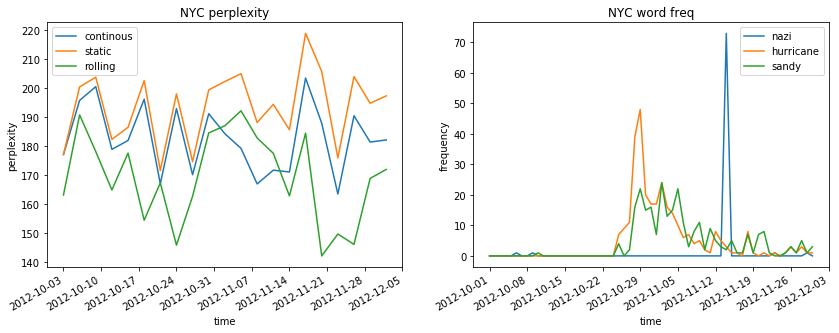

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(nyc_cont_perp), label='continous')
ax[0].plot(*get_perplexities(nyc_static_perp), label='static')
ax[0].plot(*get_perplexities(nyc_roll_perp), label='rolling')
ax[0].set_title('NYC perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()


for key in nyc_word_counts.keys():
    ax[1].plot(*zip(*nyc_word_counts[key]), label=key)
ax[1].set_title('NYC word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

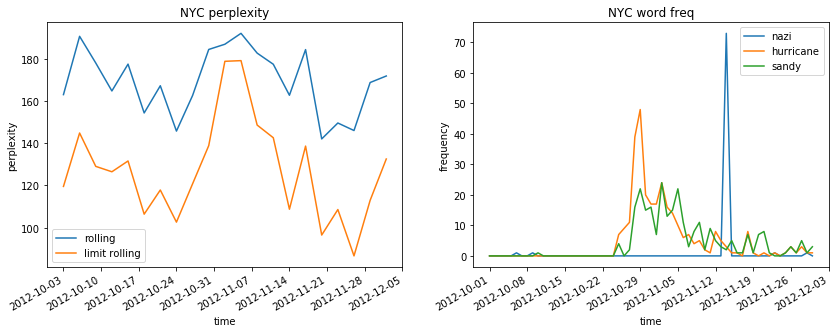

In [205]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(nyc_roll_perp), label='rolling')
ax[0].plot(*get_perplexities(nyc_roll_limit_perp), label='limit rolling')
ax[0].set_title('NYC perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()


for key in nyc_word_counts.keys():
    ax[1].plot(*zip(*nyc_word_counts[key]), label=key)
ax[1].set_title('NYC word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

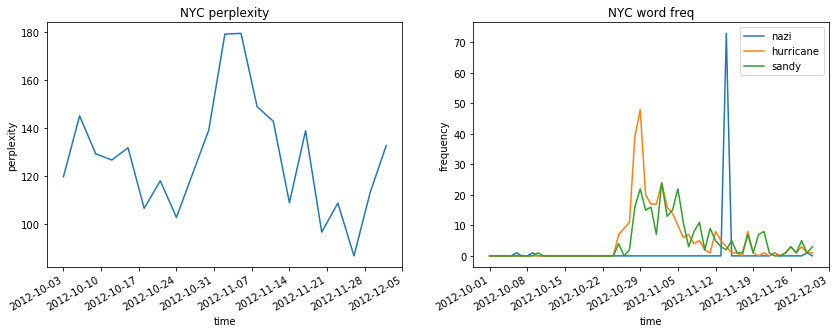

In [302]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(nyc_roll_limit_perp), label='word limit rolling')
ax[0].set_title('NYC perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
#ax[0].legend()


for key in nyc_word_counts.keys():
    ax[1].plot(*zip(*nyc_word_counts[key]), label=key)
ax[1].set_title('NYC word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

In [232]:
nyc_slices_perp = perplexity_slices(nyc_df,
                                    start_train_date=datetime.date(2012, 9, 1),
                                    end_train_date=datetime.date(2012, 11, 30))

nyc_slices_limit_perp = perplexity_slices(nyc_df, post_length=POST_LEN,
                                    start_train_date=datetime.date(2012, 9, 1),
                                    end_train_date=datetime.date(2012, 11, 30))

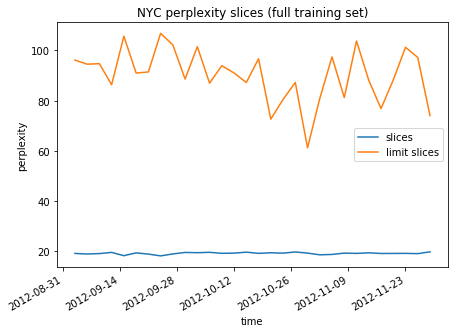

In [233]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(*get_perplexities(nyc_slices_perp), label='slices')
ax.plot(*get_perplexities(nyc_slices_limit_perp), label='limit slices')
ax.set_title('NYC perplexity slices (full training set)')
ax.set_ylabel('perplexity')
ax.set_xlabel('time')
ax.legend()
fig.autofmt_xdate()

## Hurricane Irma (Florida/Miami), August 30th - Sept. 16

### Miami

In [72]:
tokens = nltk.word_tokenize(get_raw_text(miami_df))
#print tokens[0:10]

In [73]:
token_feed = (utils.canonicalize_word(w) for w in tokens)

# Collect counts of tokens and assign wordids.
vocab = vocabulary.Vocabulary(token_feed)
print "Vocabulary size: %d" % vocab.size

# Print out some (debugging) statistics to make sure everything went
# as we expected.  (Unsurprisingly, you should see "the" as the most popular word.)
print "Most common unigrams:"
for word, count in vocab.unigram_counts.most_common(10):
    print "\"%s\": %d" % (word, count)

Vocabulary size: 30082
Most common unigrams:
".": 43274
"the": 27176
",": 23264
"to": 18825
"i": 17176
"a": 16588
"and": 15849
"you": 12228
"it": 11713
"of": 11334


#### Add K Smoothing Trigrams

In [264]:
# continous training perplexity
start_train_time = miami_df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local']
start_train_date = start_train_time.date()
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

perplexities = []

miami_cont_perp = run_snapshot_perplexity(df=miami_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        update_training_set=True,
                        run_len=60, model=ngram_lm.AddKTrigramLM)

In [265]:
# static training perplexity
start_train_time = miami_df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local']
start_train_date = start_train_time.date()
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

perplexities = []

miami_static_perp = run_snapshot_perplexity(df=miami_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        update_training_set=False,
                        run_len=60, model=ngram_lm.AddKTrigramLM)

In [266]:
# rolling training perplexity
start_train_date = datetime.date(2017, 7, 29)
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

perplexities = []

miami_roll_perp = run_snapshot_perplexity(df=miami_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.AddKTrigramLM)

In [267]:
miami_word_counts = {}

In [268]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

miami_word_counts['hurricane'] = get_word_freq_by_day(miami_df, start_date, end_date, 'hurricane')

In [269]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

miami_word_counts['irma'] = get_word_freq_by_day(miami_df, start_date, end_date, 'irma')

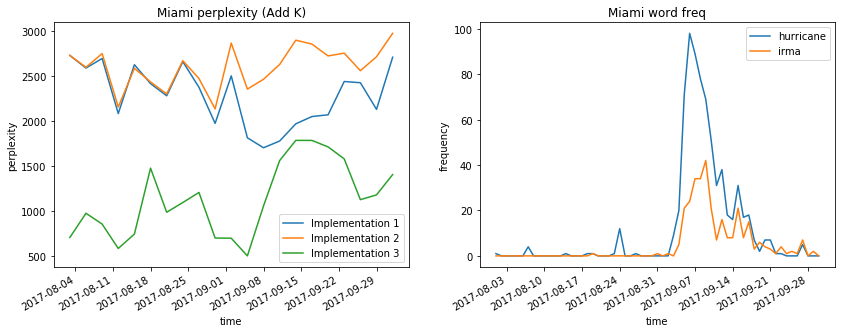

In [271]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(miami_cont_perp), label='Implementation 1')
ax[0].plot(*get_perplexities(miami_static_perp), label='Implementation 2')
ax[0].plot(*get_perplexities(miami_roll_perp), label='Implementation 3')
ax[0].set_title('Miami perplexity (Add K)')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()

for key in miami_word_counts.keys():
    ax[1].plot(*zip(*miami_word_counts[key]), label=key)
ax[1].set_title('Miami word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

#### Knesser Ney Smoothing Trigram

In [272]:
# continous training perplexity
start_train_time = miami_df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local']
start_train_date = start_train_time.date()
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

perplexities = []

miami_cont_perp_kn = run_snapshot_perplexity(df=miami_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        update_training_set=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [273]:
# static training perplexity
start_train_time = miami_df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local']
start_train_date = start_train_time.date()
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

perplexities = []

miami_static_perp_kn = run_snapshot_perplexity(df=miami_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        update_training_set=False,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [274]:
# rolling training perplexity
start_train_date = datetime.date(2017, 7, 29)
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

perplexities = []

miami_roll_perp_kn = run_snapshot_perplexity(df=miami_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [275]:
# rolling training perplexity
start_train_date = datetime.date(2017, 7, 29)
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

perplexities = []

miami_roll_limit_perp_kn = run_snapshot_perplexity(df=miami_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3, post_length=POST_LEN,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [276]:
miami_vocab_size, miami_comment_len = get_vocab_size(miami_df, start_date=datetime.date(2017, 8, 1),
                                                end_date=datetime.date(2017, 9, 30), post_length=POST_LEN)

In [277]:
miami_word_counts_kn = {}

In [278]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

miami_word_counts_kn['hurricane'] = get_word_freq_by_day(miami_df, start_date, end_date, 'hurricane')

In [279]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

miami_word_counts_kn['irma'] = get_word_freq_by_day(miami_df, start_date, end_date, 'irma')

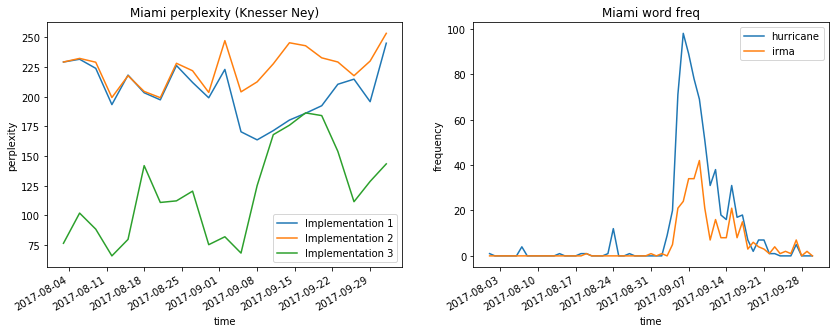

In [280]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(miami_cont_perp_kn), label='Implementation 1')
ax[0].plot(*get_perplexities(miami_static_perp_kn), label='Implementation 2')
ax[0].plot(*get_perplexities(miami_roll_perp_kn), label='Implementation 3')
ax[0].set_title('Miami perplexity (Knesser Ney)')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()

for key in miami_word_counts.keys():
    ax[1].plot(*zip(*miami_word_counts_kn[key]), label=key)
ax[1].set_title('Miami word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

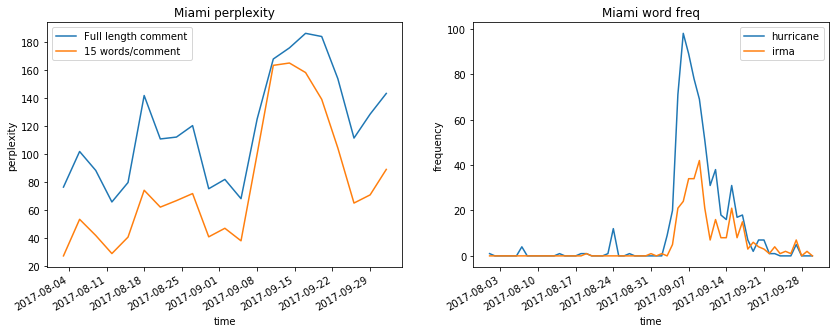

In [286]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(miami_roll_perp_kn), label='Full length comment')
ax[0].plot(*get_perplexities(miami_roll_limit_perp_kn), label='15 words/comment')
ax[0].set_title('Miami perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()

for key in miami_word_counts.keys():
    ax[1].plot(*zip(*miami_word_counts[key]), label=key)
ax[1].set_title('Miami word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

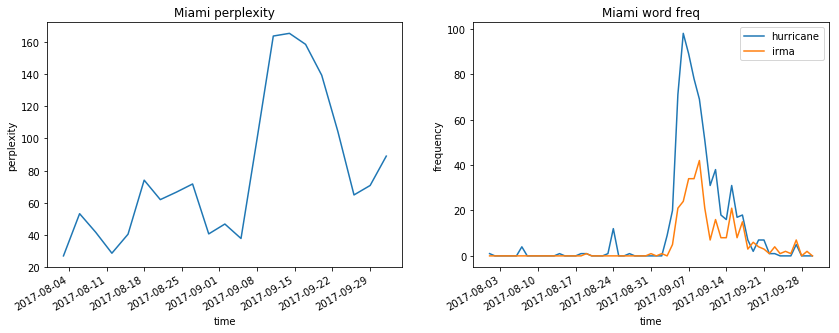

In [293]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(miami_roll_limit_perp_kn))
ax[0].set_title('Miami perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
#ax[0].legend()

for key in miami_word_counts.keys():
    ax[1].plot(*zip(*miami_word_counts[key]), label=key)
ax[1].set_title('Miami word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

In [234]:
# train on full dataset, test on 3 day windows
miami_slices_perp = perplexity_slices(miami_df,
                                      start_train_date=datetime.date(2017, 8, 1),
                                      end_train_date=datetime.date(2017, 9, 30))

miami_slices_limit_perp = perplexity_slices(miami_df, post_length=POST_LEN,
                                      start_train_date=datetime.date(2017, 8, 1),
                                      end_train_date=datetime.date(2017, 9, 30))

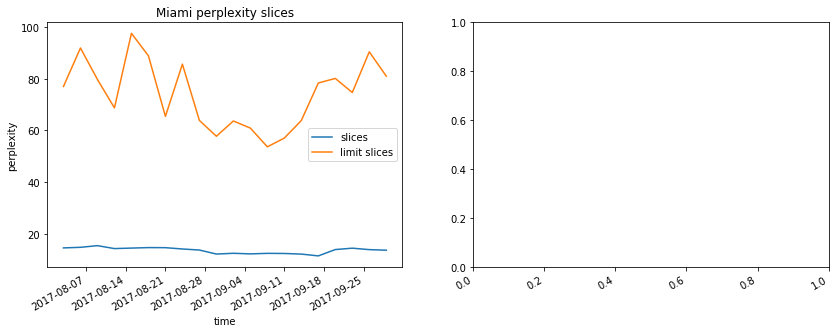

In [235]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(miami_slices_perp), label='slices')
ax[0].plot(*get_perplexities(miami_slices_limit_perp), label='limit slices')
ax[0].set_title('Miami perplexity slices')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()
fig.autofmt_xdate()

### Florida

In [93]:
tokens = nltk.word_tokenize(get_raw_text(florida_df))

token_feed = (utils.canonicalize_word(w) for w in tokens)

# Collect counts of tokens and assign wordids.
vocab = vocabulary.Vocabulary(token_feed)
print "Vocabulary size: %d" % vocab.size

# Print out some (debugging) statistics to make sure everything went
# as we expected.  (Unsurprisingly, you should see "the" as the most popular word.)
print "Most common unigrams:"
for word, count in vocab.unigram_counts.most_common(10):
    print "\"%s\": %d" % (word, count)

Vocabulary size: 29259
Most common unigrams:
".": 42532
"the": 26913
",": 22449
"to": 19222
"a": 16098
"i": 16055
"and": 14870
"you": 11711
"it": 11470
"of": 11416


In [94]:
# continous training perplexity
start_train_time = florida_df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local']
start_train_date = start_train_time.date()
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)


florida_cont_perp = run_snapshot_perplexity(df=florida_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        update_training_set=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [95]:
# static training perplexity
start_train_time = florida_df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local']
start_train_date = start_train_time.date()
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

florida_static_perp = run_snapshot_perplexity(df=florida_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        update_training_set=False,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [96]:
# rolling training perplexity
start_train_date = datetime.date(2017, 7, 29)
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

perplexities = []

florida_roll_perp = run_snapshot_perplexity(df=florida_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [208]:
# rolling training perplexity, limited
start_train_date = datetime.date(2017, 7, 29)
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

perplexities = []

florida_roll_limit_perp = run_snapshot_perplexity(df=florida_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3, post_length=POST_LEN,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [209]:
florida_vocab_size, florida_comment_len = get_vocab_size(florida_df, start_date=datetime.date(2017, 8, 1),
                                                end_date=datetime.date(2017, 9, 30), post_length=POST_LEN)

In [99]:
florida_word_counts = {}

In [100]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

florida_word_counts['hurricane'] = get_word_freq_by_day(florida_df, start_date, end_date, 'hurricane')

# for count in florida_word_counts['hurricane']:
#     print count

In [101]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

florida_word_counts['irma'] = get_word_freq_by_day(florida_df, start_date, end_date, 'irma')

# for count in florida_word_counts['irma']:
#     print count

In [102]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

florida_word_counts['power'] = get_word_freq_by_day(florida_df, start_date, end_date, 'power')

# for count in florida_word_counts['power']:
#     print count

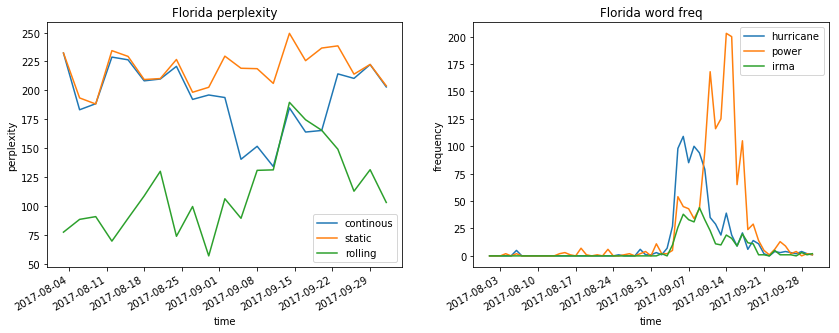

In [103]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(florida_cont_perp), label='continous')
ax[0].plot(*get_perplexities(florida_static_perp), label='static')
ax[0].plot(*get_perplexities(florida_roll_perp), label='rolling')
ax[0].set_title('Florida perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()

for key in florida_word_counts.keys():
    ax[1].plot(*zip(*florida_word_counts[key]), label=key)
ax[1].set_title('Florida word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()
fig.autofmt_xdate()

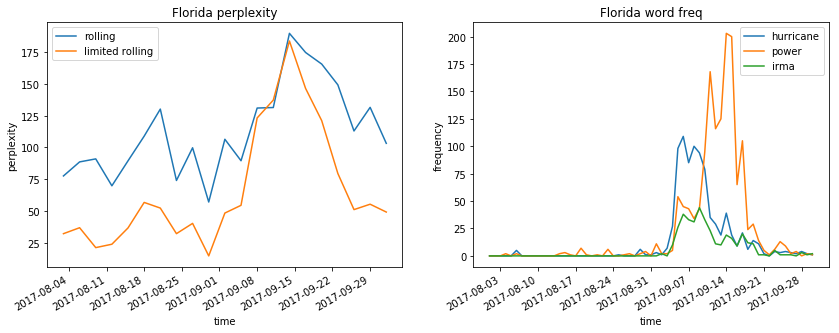

In [211]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(florida_roll_perp), label='rolling')
ax[0].plot(*get_perplexities(florida_roll_limit_perp), label='limited rolling')
ax[0].set_title('Florida perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()

for key in florida_word_counts.keys():
    ax[1].plot(*zip(*florida_word_counts[key]), label=key)
ax[1].set_title('Florida word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()
fig.autofmt_xdate()

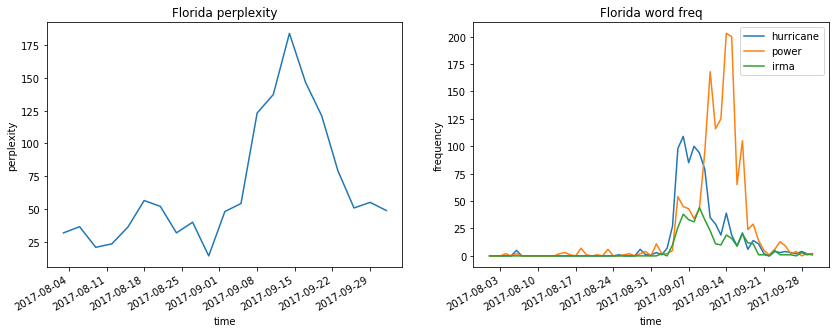

In [292]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(florida_roll_limit_perp))
ax[0].set_title('Florida perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
#ax[0].legend()

for key in florida_word_counts.keys():
    ax[1].plot(*zip(*florida_word_counts[key]), label=key)
ax[1].set_title('Florida word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()
fig.autofmt_xdate()

In [105]:
# train on full dataset, test on 3 day windows
florida_slices_perp = perplexity_slices(florida_df,
                                      start_train_date=datetime.date(2017, 8, 1),
                                      end_train_date=datetime.date(2017, 9, 30))

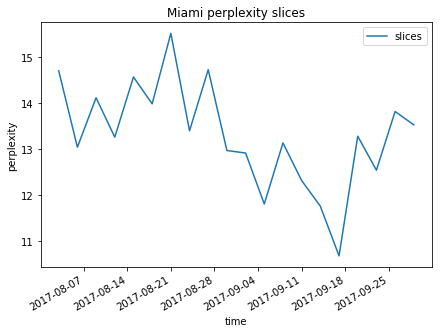

In [106]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(*get_perplexities(florida_slices_perp), label='slices')
ax.set_title('Miami perplexity slices')
ax.set_ylabel('perplexity')
ax.set_xlabel('time')
ax.legend()
fig.autofmt_xdate()

In [107]:
florida_subset_2 = florida_df[(florida_df['created_at_local'].dt.date >= datetime.date(2017, 9, 11)) & \
                              (florida_df['created_at_local'].dt.date <= datetime.date(2017, 9, 13))]

tokens = nltk.word_tokenize(get_raw_text(florida_subset_2))
token_feed = (utils.canonicalize_word(w) for w in tokens)

# Collect counts of tokens and assign wordids.
florida_subset_vocab = vocabulary.Vocabulary(token_feed)
print "Vocabulary size: %d" % vocab.size

Vocabulary size: 29259


In [108]:
# Print out some (debugging) statistics to make sure everything went
# as we expected.  (Unsurprisingly, you should see "the" as the most popular word.)
print "Most common unigrams:"
for word, count in florida_subset_vocab.unigram_counts.most_common(300):
    print "\"%s\": %d" % (word, count)

Most common unigrams:
".": 2745
"the": 1614
",": 1309
"i": 1121
"to": 1093
"a": 985
"and": 917
"it": 705
"in": 705
"of": 691
"is": 592
"you": 583
"that": 540
"for": 443
"?": 425
"power": 409
"n't": 404
"'s": 399
"are": 372
"was": 361
"on": 361
"but": 332
":": 327
"they": 322
"have": 318
"my": 315
"we": 310
"%": 298
"this": 292
"be": 282
"!": 278
"(": 276
"not": 274
")": 274
"at": 254
"]": 243
"[": 243
"out": 241
"so": 239
"with": 218
"if": 214
"just": 211
";": 208
"no": 208
"there": 205
"do": 204
"all": 202
"'m": 198
"as": 196
"from": 195
"or": 192
"back": 188
"people": 178
"DG": 177
"up": 165
"DGDG": 151
"about": 150
"get": 150
"your": 144
"&": 144
"like": 143
"https": 142
"got": 138
"had": 133
"...": 131
"'re": 129
"what": 126
"one": 123
"by": 122
"here": 121
"me": 118
"their": 115
"did": 114
"has": 112
"amp": 111
"would": 111
"them": 110
"can": 110
"still": 108
"been": 107
"only": 104
"an": 103
"when": 103
"now": 101
"how": 100
"were": 98
"some": 96
"deleted": 96
"gas": 91
"florida"

 ## Hurricane Harvey (Houston), Around August 25

In [109]:
#houston_subset_df = houston_df[houston_df['created_at_local'].dt.date > datetime.date(2017, 7, 15)]
df_size = houston_df.shape[0]
chosen_idx = np.random.choice(df_size, replace=False, size=df_size/4)
houston_subset_df = houston_df.iloc[chosen_idx]
houston_subset_df.shape

(72444, 27)

In [110]:
tokens = nltk.word_tokenize(get_raw_text(houston_subset_df))

token_feed = (utils.canonicalize_word(w) for w in tokens)

# Collect counts of tokens and assign wordids.
vocab = vocabulary.Vocabulary(token_feed)
print "Vocabulary size: %d" % vocab.size

# Print out some (debugging) statistics to make sure everything went
# as we expected.  (Unsurprisingly, you should see "the" as the most popular word.)
print "Most common unigrams:"
for word, count in vocab.unigram_counts.most_common(10):
    print "\"%s\": %d" % (word, count)

Vocabulary size: 56057
Most common unigrams:
".": 113000
"the": 71757
",": 56249
"to": 49473
"i": 45413
"a": 42458
"and": 38591
"you": 30407
"it": 30397
"of": 29909


In [111]:
# continous training perplexity
# start_train_time = houston_subset_df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local']
# start_train_date = start_train_time.date()
# end_train_date = datetime.date(2017, 8, 4)
# start_test_date = datetime.date(2017, 8, 5)


# houston_cont_perp = run_snapshot_perplexity(df=houston_subset_df, 
#                         start_train_date=start_train_date,
#                         end_train_date=end_train_date,
#                         start_test_date=start_test_date,
#                         test_days_span=3,
#                         update_training_set=True)

In [112]:
# static training perplexity
# start_train_time = houston_subset_df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local']
# start_train_date = start_train_time.date()
# end_train_date = datetime.date(2017, 8, 4)
# start_test_date = datetime.date(2017, 8, 5)

# houston_static_perp = run_snapshot_perplexity(df=houston_subset_df, 
#                         start_train_date=start_train_date,
#                         end_train_date=end_train_date,
#                         start_test_date=start_test_date,
#                         test_days_span=3,
#                         update_training_set=False)

In [113]:
# rolling training perplexity
start_train_date = datetime.date(2017, 7, 29)
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

houston_roll_perp = run_snapshot_perplexity(df=houston_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [212]:
# rolling training perplexity limited
start_train_date = datetime.date(2017, 7, 29)
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

houston_roll_limit_perp = run_snapshot_perplexity(df=houston_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3, post_length=POST_LEN,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [213]:
houston_vocab_size, houston_comment_len = get_vocab_size(houston_df, start_date=datetime.date(2017, 8, 1),
                                                end_date=datetime.date(2017, 9, 30), post_length=POST_LEN)

In [116]:
houston_word_counts = {}

In [240]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

houston_word_counts['harvey'] = get_word_freq_by_day(houston_df, start_date, end_date, 'harvey')

# for count in houston_word_counts['harvey']:
#     print count

In [241]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

houston_word_counts['hurricane'] = get_word_freq_by_day(houston_df, start_date, end_date, 'hurricane')

# for count in houston_word_counts['hurricane']:
#     print count

In [242]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

houston_word_counts['confederate'] = get_word_freq_by_day(houston_df, start_date, end_date, 'confederate')

# for count in houston_word_counts['confederate']:
#     print count

In [243]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

houston_word_counts['confederacy'] = get_word_freq_by_day(houston_df, start_date, end_date, 'confederacy')

# for count in houston_word_counts['confederacy']:
#     print count

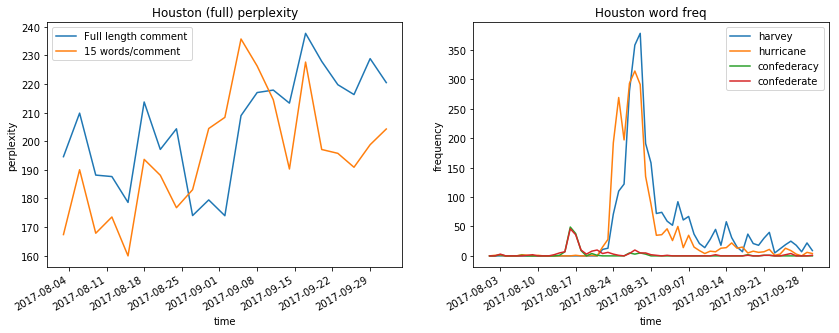

In [294]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

#ax[0].plot(*get_perplexities(houston_cont_perp), label='continous')
#ax[0].plot(*get_perplexities(houston_static_perp), label='static')
ax[0].plot(*get_perplexities(houston_roll_perp), label='Full length comment')
ax[0].plot(*get_perplexities(houston_roll_limit_perp), label='15 words/comment')
ax[0].set_title('Houston (full) perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()

for key in houston_word_counts.keys():
    ax[1].plot(*zip(*houston_word_counts[key]), label=key)
ax[1].set_title('Houston word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

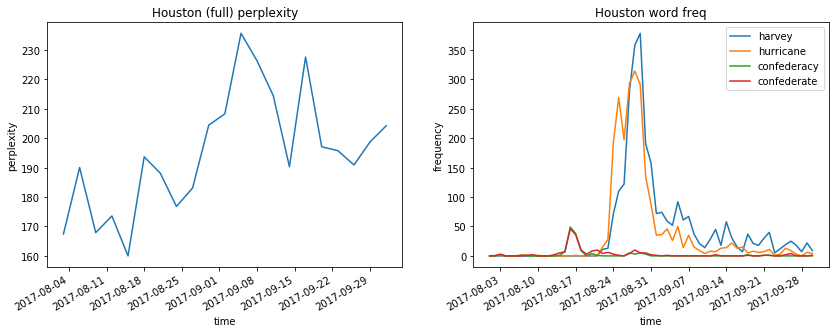

In [295]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(houston_roll_limit_perp), label='15 words/comment')
ax[0].set_title('Houston (full) perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
#ax[0].legend()

for key in houston_word_counts.keys():
    ax[1].plot(*zip(*houston_word_counts[key]), label=key)
ax[1].set_title('Houston word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

In [122]:
# rolling training perplexity
start_train_date = datetime.date(2017, 7, 29)
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

houston_subset_roll_perp = run_snapshot_perplexity(df=houston_subset_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [215]:
# rolling training perplexity limited
start_train_date = datetime.date(2017, 7, 29)
end_train_date = datetime.date(2017, 7, 31)

start_test_date = datetime.date(2017, 8, 1)

houston_subset_roll_limit_perp = run_snapshot_perplexity(df=houston_subset_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3, post_length=POST_LEN,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [216]:
houston_subset_vocab_size, houston_subset_comment_len = get_vocab_size(houston_subset_df, 
                                                                       start_date=datetime.date(2017, 8, 1),
                                                end_date=datetime.date(2017, 9, 30), post_length=POST_LEN)

In [246]:
houston_subset_word_counts = {}

In [247]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

houston_subset_word_counts['harvey'] = get_word_freq_by_day(houston_subset_df, start_date, end_date, 'harvey')

# for count in houston_word_counts['harvey']:
#     print count

In [248]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

houston_subset_word_counts['hurricane'] = get_word_freq_by_day(houston_subset_df, start_date, end_date, 'hurricane')

# for count in houston_word_counts['hurricane']:
#     print count

In [249]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

houston_subset_word_counts['confederate'] = get_word_freq_by_day(houston_subset_df, start_date, end_date, 'confederate')

# for count in houston_word_counts['confederate']:
#     print count

In [250]:
start_date = datetime.date(2017, 8, 1)
end_date = datetime.date(2017, 9, 30)

houston_subset_word_counts['confederacy'] = get_word_freq_by_day(houston_subset_df, start_date, end_date, 'confederacy')

# for count in houston_word_counts['confederacy']:
#     print count

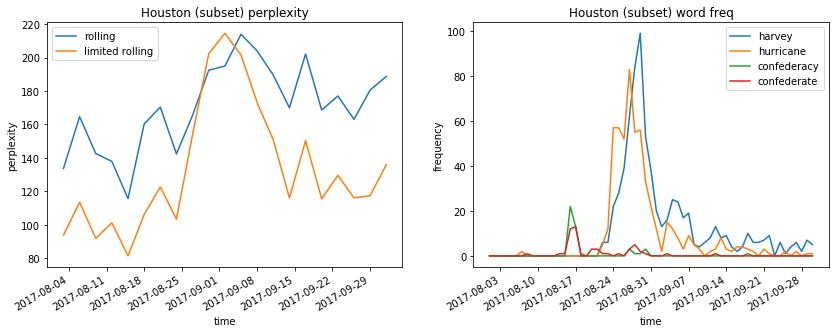

In [251]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

#ax[0].plot(*get_perplexities(houston_cont_perp), label='continous')
#ax[0].plot(*get_perplexities(houston_static_perp), label='static')
ax[0].plot(*get_perplexities(houston_subset_roll_perp), label='rolling')
ax[0].plot(*get_perplexities(houston_subset_roll_limit_perp), label='limited rolling')
ax[0].set_title('Houston (subset) perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()

for key in houston_subset_word_counts.keys():
    ax[1].plot(*zip(*houston_subset_word_counts[key]), label=key)
ax[1].set_title('Houston (subset) word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

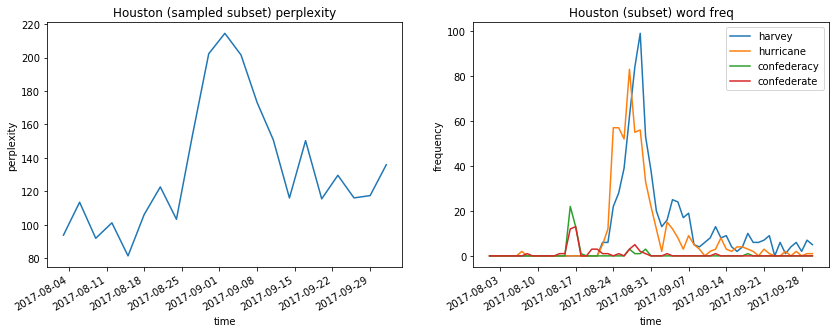

In [297]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(houston_subset_roll_limit_perp), label='word limited rolling')
ax[0].set_title('Houston (sampled subset) perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
#ax[0].legend()

for key in houston_subset_word_counts.keys():
    ax[1].plot(*zip(*houston_subset_word_counts[key]), label=key)
ax[1].set_title('Houston (subset) word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

In [131]:
# train on full dataset, test on 3 day windows
houston_slices_perp = perplexity_slices(houston_df,
                                      start_train_date=datetime.date(2017, 8, 1),
                                      end_train_date=datetime.date(2017, 9, 30))

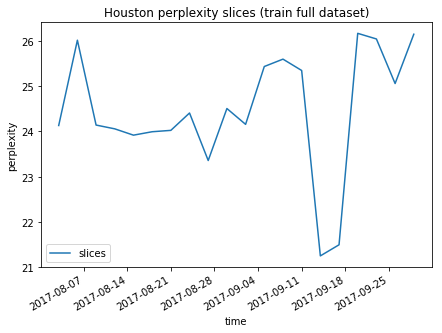

In [132]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(*get_perplexities(houston_slices_perp), label='slices')
ax.set_title('Houston perplexity slices (train full dataset)')
ax.set_ylabel('perplexity')
ax.set_xlabel('time')
ax.legend()
fig.autofmt_xdate()

In [133]:
houston_subset_2 = houston_df[(houston_df['created_at_local'].dt.date >= datetime.date(2017, 8, 15)) & \
                              (houston_df['created_at_local'].dt.date <= datetime.date(2017, 8, 17))]

tokens = nltk.word_tokenize(get_raw_text(houston_subset_2))
token_feed = (utils.canonicalize_word(w) for w in tokens)

# Collect counts of tokens and assign wordids.
vocab = vocabulary.Vocabulary(token_feed)
print "Vocabulary size: %d" % vocab.size

Vocabulary size: 12542


In [134]:
# Print out some (debugging) statistics to make sure everything went
# as we expected.  (Unsurprisingly, you should see "the" as the most popular word.)
print "Most common unigrams:"
for word, count in vocab.unigram_counts.most_common(300):
    print "\"%s\": %d" % (word, count)

Most common unigrams:
".": 8116
"the": 5965
",": 4283
"to": 3760
"a": 3146
"and": 2972
"i": 2936
"of": 2579
"you": 2448
"it": 2155
"that": 2018
"in": 1900
"is": 1719
"n't": 1313
"'s": 1300
"?": 1268
"for": 1262
"they": 1221
"are": 1009
"do": 953
"on": 948
"was": 927
"this": 920
"have": 878
"not": 874
"be": 848
"]": 792
"[": 792
"but": 762
")": 760
"with": 743
"(": 737
":": 724
"as": 707
"if": 688
"people": 661
"or": 647
";": 615
"at": 599
"just": 596
"!": 582
"like": 573
"there": 558
"so": 545
"about": 545
"''": 540
"your": 530
"``": 510
"all": 508
"my": 488
"what": 470
"&": 467
"we": 463
"their": 457
"from": 439
"them": 436
"'re": 432
"can": 430
"up": 429
"no": 427
"would": 412
"one": 400
"get": 394
"he": 392
"'m": 386
"deleted": 385
"an": 378
"out": 376
"by": 368
"were": 364
"me": 352
"DGDG": 340
"who": 340
"...": 332
"when": 331
"has": 319
"some": 319
"DG": 318
"https": 305
"how": 301
"did": 298
"will": 293
"gt": 292
"houston": 288
"more": 278
"go": 269
"because": 269
"know": 263
"s

### Boston Bombing, April 15

In [135]:
tokens = nltk.word_tokenize(get_raw_text(boston_bomb_df))

token_feed = (utils.canonicalize_word(w) for w in tokens)

# Collect counts of tokens and assign wordids.
vocab = vocabulary.Vocabulary(token_feed)
print "Vocabulary size: %d" % vocab.size

# Print out some (debugging) statistics to make sure everything went
# as we expected.  (Unsurprisingly, you should see "the" as the most popular word.)
print "Most common unigrams:"
for word, count in vocab.unigram_counts.most_common(10):
    print "\"%s\": %d" % (word, count)

Vocabulary size: 56441
Most common unigrams:
".": 107706
"the": 79165
",": 67001
"to": 48881
"i": 48655
"a": 46066
"and": 37811
"of": 31856
"it": 29980
"you": 28985


In [136]:
# continous training perplexity
# start_train_time = boston_bomb_df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local']
# start_train_date = start_train_time.date()
# end_train_date = datetime.date(2013, 3, 31)
# start_test_date = datetime.date(2013, 4, 1)


# boston_bomb_cont_perp = run_snapshot_perplexity(df=boston_bomb_df, 
#                         start_train_date=start_train_date,
#                         end_train_date=end_train_date,
#                         start_test_date=start_test_date,
#                         test_days_span=3,
#                         update_training_set=True)

In [137]:
# static training perplexity
# start_train_time = boston_bomb_df.sort_values('created_at_local', ascending=True).iloc[0]['created_at_local']
# start_train_date = start_train_time.date()
# end_train_date = datetime.date(2013, 3, 31)
# start_test_date = datetime.date(2013, 4, 1)

# boston_bomb_static_perp = run_snapshot_perplexity(df=boston_bomb_df, 
#                         start_train_date=start_train_date,
#                         end_train_date=end_train_date,
#                         start_test_date=start_test_date,
#                         test_days_span=3,
#                         update_training_set=False)

In [138]:
# rolling training perplexity
start_train_date = datetime.date(2013, 3, 12)
end_train_date = datetime.date(2013, 3, 14)

start_test_date = datetime.date(2013, 3, 15)

boston_bomb_roll_perp = run_snapshot_perplexity(df=boston_bomb_df,
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [218]:
# rolling training perplexity
start_train_date = datetime.date(2013, 3, 12)
end_train_date = datetime.date(2013, 3, 14)

start_test_date = datetime.date(2013, 3, 15)

boston_bomb_roll_limit_perp = run_snapshot_perplexity(df=boston_bomb_df,
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3, post_length=POST_LEN,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [219]:
boston_bomb_vocab_size, boston_bomb_comment_len = get_vocab_size(boston_bomb_df, start_date=datetime.date(2013, 3, 15),
                                                end_date=datetime.date(2013, 5, 15), post_length=POST_LEN)

In [141]:
boston_bomb_word_counts = {}

In [142]:
start_date = datetime.date(2013, 3, 15)
end_date = datetime.date(2013, 5, 15)

boston_bomb_word_counts['bomb'] = get_word_freq_by_day(boston_bomb_df, start_date, end_date, 'bomb')

# for count in boston_bomb_word_counts['bomb']:
#     print count

In [143]:
start_date = datetime.date(2013, 3, 15)
end_date = datetime.date(2013, 5, 15)

boston_bomb_word_counts['explosion'] = get_word_freq_by_day(boston_bomb_df, start_date, end_date, 'explosion')

# for count in boston_bomb_word_counts['explosion']:
#     print count

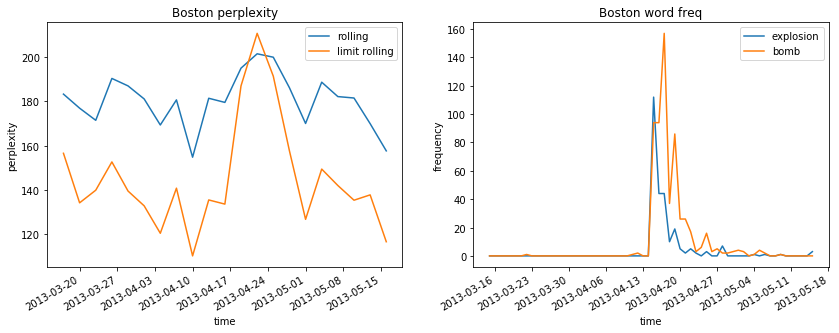

In [220]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

#ax[0].plot(*get_perplexities(boston_bomb_cont_perp), label='continuous')
#ax[0].plot(*get_perplexities(boston_bomb_static_perp), label='static')
ax[0].plot(*get_perplexities(boston_bomb_roll_perp), label='rolling')
ax[0].plot(*get_perplexities(boston_bomb_roll_limit_perp), label='limit rolling')
ax[0].set_title('Boston perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()

for key in boston_bomb_word_counts.keys():
    ax[1].plot(*zip(*boston_bomb_word_counts[key]), label=key)
ax[1].set_title('Boston word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

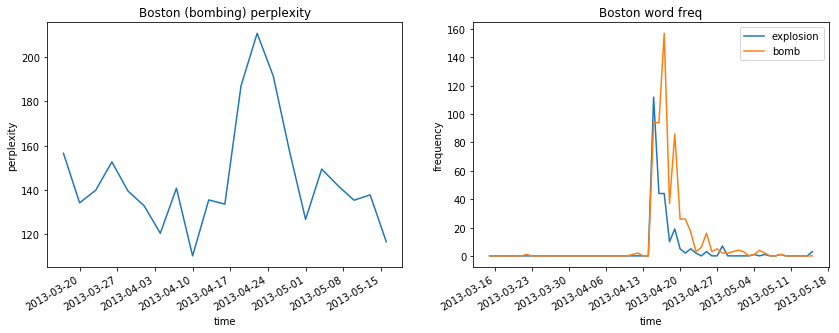

In [298]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(boston_bomb_roll_limit_perp), label='word limit rolling')
ax[0].set_title('Boston (bombing) perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
#ax[0].legend()

for key in boston_bomb_word_counts.keys():
    ax[1].plot(*zip(*boston_bomb_word_counts[key]), label=key)
ax[1].set_title('Boston word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

In [145]:
# train on full dataset, test on 3 day windows
boston_slices_perp = perplexity_slices(boston_bomb_df,
                                      start_train_date=datetime.date(2013, 3, 15),
                                      end_train_date=datetime.date(2013, 5, 15))

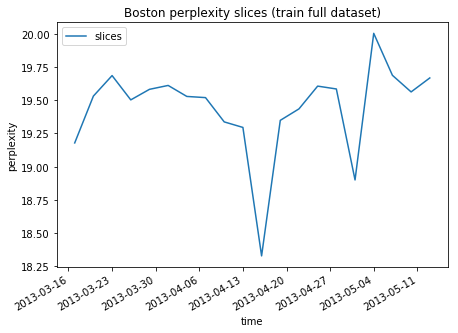

In [146]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(*get_perplexities(boston_slices_perp), label='slices')
ax.set_title('Boston perplexity slices (train full dataset)')
ax.set_ylabel('perplexity')
ax.set_xlabel('time')
ax.legend()
fig.autofmt_xdate()

## Puerto Rico, Hurricane Maria, September 16, 2017 – October 3, 2017

In [147]:
# rolling training perplexity
start_train_date = datetime.date(2017, 8, 29)
end_train_date = datetime.date(2017, 8, 31)

start_test_date = datetime.date(2017, 9, 1)

puerto_rico_roll_perp = run_snapshot_perplexity(df=puerto_rico_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [221]:
# rolling training perplexity
start_train_date = datetime.date(2017, 8, 29)
end_train_date = datetime.date(2017, 8, 31)

start_test_date = datetime.date(2017, 9, 1)

puerto_rico_roll_limit_perp = run_snapshot_perplexity(df=puerto_rico_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3, post_length=POST_LEN,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [222]:
pr_vocab_size, pr_comment_len = get_vocab_size(puerto_rico_df, start_date=datetime.date(2017, 9, 1),
                                                end_date=datetime.date(2017, 10, 30), post_length=POST_LEN)

In [150]:
puerto_rico_word_counts = {}

In [151]:
start_date = datetime.date(2017, 9, 1)
end_date = datetime.date(2017, 10, 30)

puerto_rico_word_counts['hurricane'] = get_word_freq_by_day(puerto_rico_df, start_date, end_date, 'hurricane')

In [152]:
start_date = datetime.date(2017, 9, 1)
end_date = datetime.date(2017, 10, 30)

puerto_rico_word_counts['maria'] = get_word_freq_by_day(puerto_rico_df, start_date, end_date, 'maria')

In [153]:
start_date = datetime.date(2017, 9, 1)
end_date = datetime.date(2017, 10, 30)

puerto_rico_word_counts['power'] = get_word_freq_by_day(puerto_rico_df, start_date, end_date, 'power')

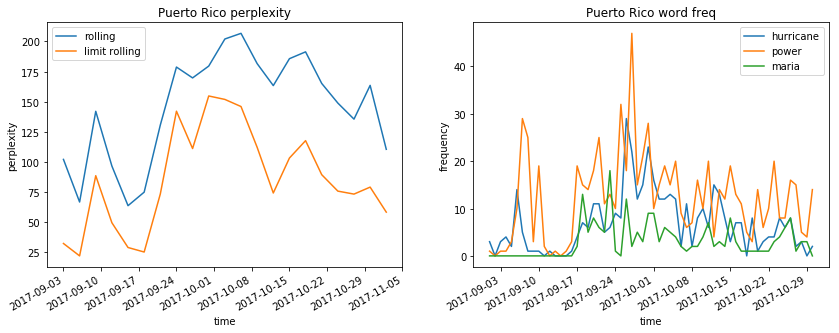

In [223]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

#ax[0].plot(*get_perplexities(boston_bomb_cont_perp), label='continuous')
#ax[0].plot(*get_perplexities(boston_bomb_static_perp), label='static')
ax[0].plot(*get_perplexities(puerto_rico_roll_perp), label='rolling')
ax[0].plot(*get_perplexities(puerto_rico_roll_limit_perp), label='limit rolling')
ax[0].set_title('Puerto Rico perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()

for key in puerto_rico_word_counts.keys():
    ax[1].plot(*zip(*puerto_rico_word_counts[key]), label=key)
ax[1].set_title('Puerto Rico word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

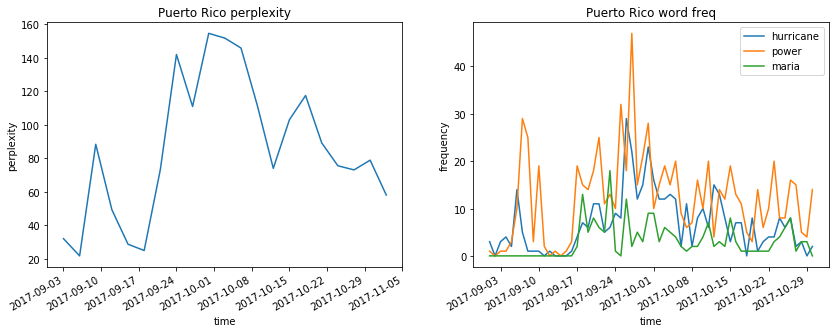

In [299]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(puerto_rico_roll_limit_perp), label='word limit rolling')
ax[0].set_title('Puerto Rico perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
#ax[0].legend()

for key in puerto_rico_word_counts.keys():
    ax[1].plot(*zip(*puerto_rico_word_counts[key]), label=key)
ax[1].set_title('Puerto Rico word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

In [155]:
# train on full dataset, test on 3 day windows
puerto_rico_slices_perp = perplexity_slices(puerto_rico_df,
                                      start_train_date=datetime.date(2017, 9, 1),
                                      end_train_date=datetime.date(2017, 10, 30))

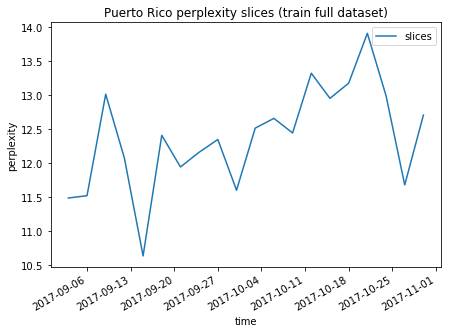

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(*get_perplexities(puerto_rico_slices_perp), label='slices')
ax.set_title('Puerto Rico perplexity slices (train full dataset)')
ax.set_ylabel('perplexity')
ax.set_xlabel('time')
ax.legend()
fig.autofmt_xdate()

## Las Vegas Shooting, October 1, 2017

In [157]:
# rolling training perplexity
start_train_date = datetime.date(2017, 8, 29)
end_train_date = datetime.date(2017, 8, 31)

start_test_date = datetime.date(2017, 9, 1)

vegas_roll_perp = run_snapshot_perplexity(df=vegas_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [199]:
# rolling training perplexity limited length post
start_train_date = datetime.date(2017, 8, 29)
end_train_date = datetime.date(2017, 8, 31)

start_test_date = datetime.date(2017, 9, 1)

vegas_roll_limit_perp = run_snapshot_perplexity(df=vegas_df, 
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3, post_length=POST_LEN,
                        use_snapshot_window=True,
                        run_len=60, model=ngram_lm.KNTrigramLM)

In [224]:
vegas_vocab_size, vegas_comment_len = get_vocab_size(vegas_df, start_date=datetime.date(2017, 9, 1),
                                                end_date=datetime.date(2017, 10, 30), post_length=POST_LEN)

In [160]:
vegas_word_counts = {}

In [161]:
start_date = datetime.date(2017, 9, 1)
end_date = datetime.date(2017, 10, 31)

vegas_word_counts['gun'] = get_word_freq_by_day(vegas_df, start_date, end_date, 'gun')

In [162]:
start_date = datetime.date(2017, 9, 1)
end_date = datetime.date(2017, 10, 31)

vegas_word_counts['shooting'] = get_word_freq_by_day(vegas_df, start_date, end_date, 'shooting')

In [163]:
start_date = datetime.date(2017, 9, 1)
end_date = datetime.date(2017, 10, 31)

vegas_word_counts['blood'] = get_word_freq_by_day(vegas_df, start_date, end_date, 'blood')

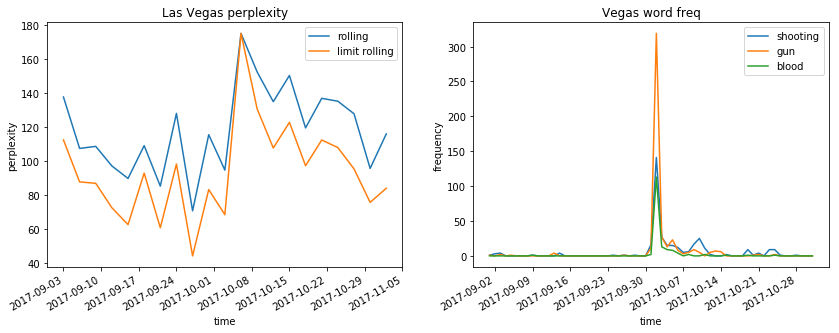

In [225]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

#ax[0].plot(*get_perplexities(boston_bomb_cont_perp), label='continuous')
#ax[0].plot(*get_perplexities(boston_bomb_static_perp), label='static')
ax[0].plot(*get_perplexities(vegas_roll_perp), label='rolling')
ax[0].plot(*get_perplexities(vegas_roll_limit_perp), label='limit rolling')
ax[0].set_title('Las Vegas perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()

for key in vegas_word_counts.keys():
    ax[1].plot(*zip(*vegas_word_counts[key]), label=key)
ax[1].set_title('Vegas word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

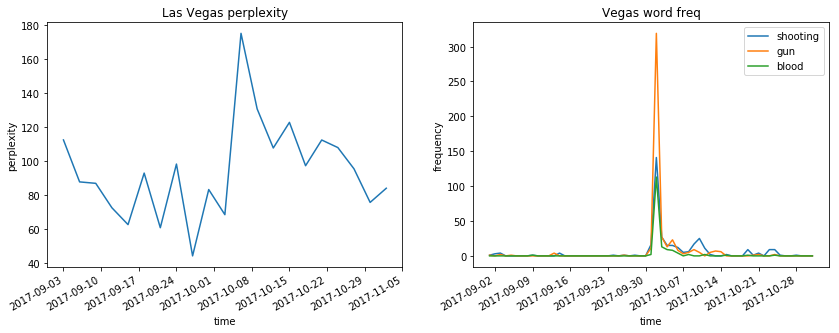

In [300]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(vegas_roll_limit_perp), label='word limit rolling')
ax[0].set_title('Las Vegas perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
#ax[0].legend()

for key in vegas_word_counts.keys():
    ax[1].plot(*zip(*vegas_word_counts[key]), label=key)
ax[1].set_title('Vegas word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

In [165]:
# train on full dataset, test on 3 day windows
vegas_slices_perp = perplexity_slices(vegas_df,
                                      start_train_date=datetime.date(2017, 9, 1),
                                      end_train_date=datetime.date(2017, 10, 30))

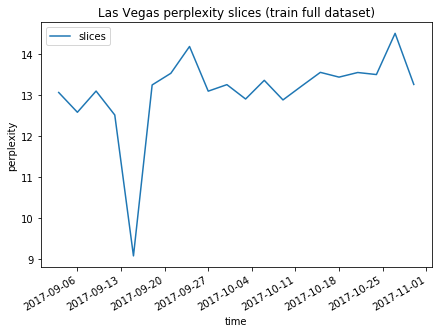

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(*get_perplexities(vegas_slices_perp), label='slices')
ax.set_title('Las Vegas perplexity slices (train full dataset)')
ax.set_ylabel('perplexity')
ax.set_xlabel('time')
ax.legend()
fig.autofmt_xdate()

## Boston World Series Oct 23-30 2013

In [167]:
tokens = nltk.word_tokenize(get_raw_text(boston_series_df))

token_feed = (utils.canonicalize_word(w) for w in tokens)

# Collect counts of tokens and assign wordids.
vocab = vocabulary.Vocabulary(token_feed)
print "Vocabulary size: %d" % vocab.size

# Print out some (debugging) statistics to make sure everything went
# as we expected.  (Unsurprisingly, you should see "the" as the most popular word.)
print "Most common unigrams:"
for word, count in vocab.unigram_counts.most_common(10):
    print "\"%s\": %d" % (word, count)

Vocabulary size: 31948
Most common unigrams:
".": 42394
"the": 32273
",": 26631
"to": 19512
"i": 19361
"a": 18494
"and": 15608
"it": 12461
"of": 12256
"in": 11819


In [168]:
# rolling training perplexity
start_train_date = datetime.date(2013, 10, 1)
end_train_date = datetime.date(2013, 10, 3)

start_test_date = datetime.date(2013, 10, 4)

boston_series_roll_perp = run_snapshot_perplexity(df=boston_series_df,
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3,
                        use_snapshot_window=True,
                        run_len=57, model=ngram_lm.KNTrigramLM)

In [226]:
# rolling training perplexity
start_train_date = datetime.date(2013, 10, 1)
end_train_date = datetime.date(2013, 10, 3)

start_test_date = datetime.date(2013, 10, 4)

boston_series_roll_limit_perp = run_snapshot_perplexity(df=boston_series_df,
                        start_train_date=start_train_date,
                        end_train_date=end_train_date,
                        start_test_date=start_test_date,
                        test_days_span=3, post_length=POST_LEN,
                        use_snapshot_window=True,
                        run_len=57, model=ngram_lm.KNTrigramLM)

In [227]:
boston_series_vocab_size, boston_series_comment_len = get_vocab_size(boston_series_df, 
                                                                     start_date=datetime.date(2013, 10, 1),
                                                end_date=datetime.date(2017, 11, 30), post_length=POST_LEN)

In [171]:
boston_series_word_counts = {}

In [172]:
start_date = datetime.date(2013, 10, 1)
end_date = datetime.date(2013, 11, 30)

boston_series_word_counts['world'] = get_word_freq_by_day(boston_series_df, start_date, end_date, 'world')

# for count in boston_bomb_word_counts['bomb']:
#     print count

In [173]:
start_date = datetime.date(2013, 10, 1)
end_date = datetime.date(2013, 11, 30)

boston_series_word_counts['series'] = get_word_freq_by_day(boston_series_df, start_date, end_date, 'series')

# for count in boston_bomb_word_counts['explosion']:
#     print count

In [174]:
start_date = datetime.date(2013, 10, 1)
end_date = datetime.date(2013, 11, 30)

boston_series_word_counts['baseball'] = get_word_freq_by_day(boston_series_df, start_date, end_date, 'baseball')

In [175]:
start_date = datetime.date(2013, 10, 1)
end_date = datetime.date(2013, 11, 30)

boston_series_word_counts['win'] = get_word_freq_by_day(boston_series_df, start_date, end_date, 'win')

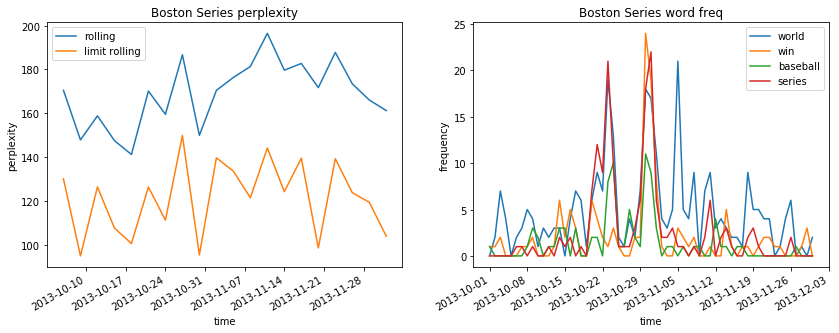

In [228]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(boston_series_roll_perp), label='rolling')
ax[0].plot(*get_perplexities(boston_series_roll_limit_perp), label='limit rolling')
ax[0].set_title('Boston Series perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
ax[0].legend()

for key in boston_series_word_counts.keys():
    ax[1].plot(*zip(*boston_series_word_counts[key]), label=key)
ax[1].set_title('Boston Series word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

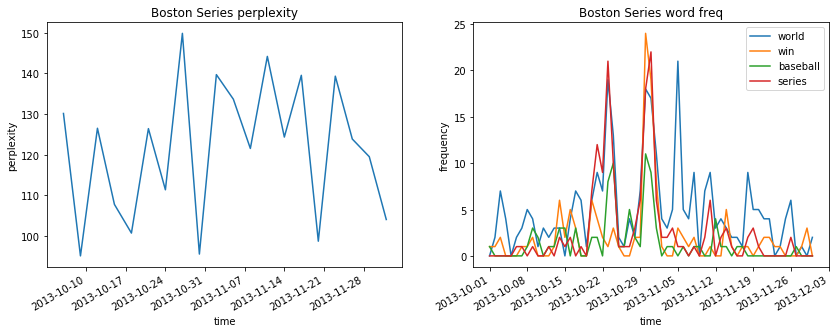

In [301]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(*get_perplexities(boston_series_roll_limit_perp), label='word limit rolling')
ax[0].set_title('Boston Series perplexity')
ax[0].set_ylabel('perplexity')
ax[0].set_xlabel('time')
#ax[0].legend()

for key in boston_series_word_counts.keys():
    ax[1].plot(*zip(*boston_series_word_counts[key]), label=key)
ax[1].set_title('Boston Series word freq')
ax[1].set_ylabel('frequency')
ax[1].set_xlabel('time')
ax[1].legend()

fig.autofmt_xdate()

In [177]:
# train on full dataset, test on 3 day windows
boston_series_slices_perp = perplexity_slices(boston_series_df,
                                      start_train_date=datetime.date(2013, 10, 1),
                                      end_train_date=datetime.date(2013, 11, 30))

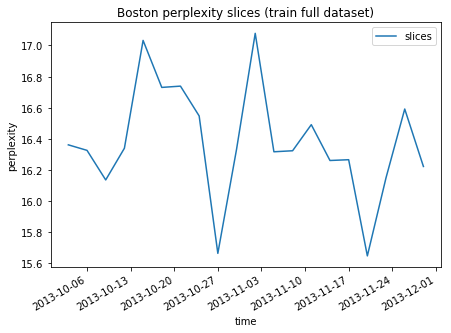

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(*get_perplexities(boston_series_slices_perp), label='slices')
ax.set_title('Boston perplexity slices (train full dataset)')
ax.set_ylabel('perplexity')
ax.set_xlabel('time')
ax.legend()
fig.autofmt_xdate()

## Word count stats

In [257]:
reddit_stats = {
    'r/boston (bombing)': (boston_bomb_vocab_size, boston_bomb_comment_len), 
    'r/boston (World Series)': (boston_series_vocab_size, boston_series_comment_len), 
    'r/florida': (florida_vocab_size, florida_comment_len), 
    'r/houston (full)': (houston_vocab_size, houston_comment_len), 
    'r/houston (sampled)': (houston_subset_vocab_size, houston_subset_comment_len), 
    'r/Miami': (miami_vocab_size, miami_comment_len), 
    'r/nyc': (nyc_vocab_size, nyc_comment_len), 
    'r/PuertoRico': (pr_vocab_size, pr_comment_len), 
    'r/vegas': (vegas_vocab_size, vegas_comment_len)
}

r/boston (World Series) 18159
r/vegas 10870
r/nyc 20857
r/boston (bombing) 27949
r/PuertoRico 14994
r/houston (sampled) 26953
r/Miami 12926
r/florida 12815
r/houston (full) 58654


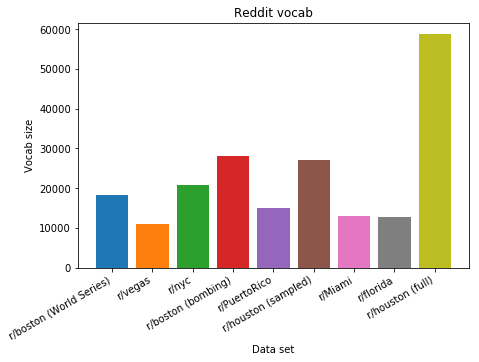

In [261]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

labels = []
for i, key in enumerate(reddit_stats):
    labels.append(key)
    print key, reddit_stats[key][0]
    ax.bar(i, reddit_stats[key][0],  )

ax.set_xticks(np.arange(len(reddit_stats)))
ax.set_xticklabels(labels)
ax.set_title('Reddit vocab')
ax.set_ylabel('Vocab size')
ax.set_xlabel('Data set')
fig.autofmt_xdate()

r/boston (World Series) 23191
r/vegas 12164
r/nyc 30195
r/boston (bombing) 49426
r/PuertoRico 12784
r/houston (sampled) 47184
r/Miami 16954
r/florida 16374
r/houston (full) 188897


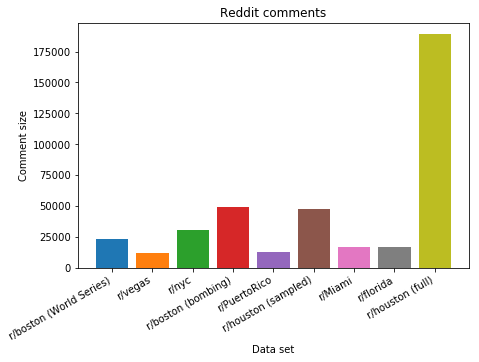

In [260]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

labels = []
for i, key in enumerate(reddit_stats):
    labels.append(key)
    print key, reddit_stats[key][1]
    ax.bar(i, reddit_stats[key][1],  )

ax.set_xticks(np.arange(len(reddit_stats)))
ax.set_xticklabels(labels)
ax.set_title('Reddit comments')
ax.set_ylabel('Comment size')
ax.set_xlabel('Data set')
fig.autofmt_xdate()